Primero procedemos a lo que es la instalación y la carga de las librerías de R. En particular, la librería de IDLD será importada de un repositorio, siendo la librería que más tarda en ser instalada.

In [ ]:
# Cargamos las librerías

# Genéricas
install.packages("remotes")
install.packages("tictoc")
install.packages("repr") # Ésta es para el tamaño de los gráficos

# Para evaluar clasificación contra los clusters reales
install.packages("clue") # Ésta es para la función de reasignado de etiquetas usando la asignación húngara y hacer CCR
install.packages("fossil") # Esto es para usar el RI
install.packages("mclust") # Estp es para usar el ARI

# Trabajamos con la librería de arquetipos. Éstas son algunos links de relevancia:
# https://cran.r-project.org/web/packages/archetypal/vignettes/archetypal.html
# https://cran.r-project.org/web/packages/archetypal/archetypal.pdf
# https://cran.r-project.org/web/packages/archetypal/index.html
# install.packages("archetypal")
install.packages("archetypes") # https://cran.r-project.org/web/packages/archetypes/vignettes/archetypes.pdf

# install.packages("grDevices") # Esta sólo la usamos cuando recién probábamos arquetipos, pero ya no para la parte de
# clustering que después nos interesa
install.packages("pracma")
install.packages("mclust")
install.packages("mvnfast")
install.packages("mvtnorm")

install.packages("microbenchmark") # Ésta es para hacer las simulaciones con los arquetipos

# Instalamos la librería del algoritmo al cual le tenemos que ganar
remotes::install_github("lfernandezpiana/idld")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘maps’, ‘shapefiles’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘nnls’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppArmadillo’, ‘B

multicool (NA -> 1.0.1    ) [CRAN]
kernlab   (NA -> 0.9-33   ) [CRAN]
FNN       (NA -> 1.1.4.1  ) [CRAN]
ash       (NA -> 1.0-15   ) [CRAN]
locfit    (NA -> 1.5-9.10 ) [CRAN]
bitops    (NA -> 1.0-9    ) [CRAN]
ks        (NA -> 1.14.3   ) [CRAN]
hdrcde    (NA -> 3.4      ) [CRAN]
pcaPP     (NA -> 2.0-5    ) [CRAN]
RCurl     (NA -> 1.98-1.16) [CRAN]
rainbow   (NA -> 3.8      ) [CRAN]
deSolve   (NA -> 1.40     ) [CRAN]
fds       (NA -> 1.8      ) [CRAN]
zoo       (NA -> 1.8-12   ) [CRAN]
fda       (NA -> 6.2.0    ) [CRAN]
RcppEigen (NA -> 0.3.4.0.2) [CRAN]
abind     (NA -> 1.4-8    ) [CRAN]
sde       (NA -> 2.0.18   ) [CRAN]


Installing 18 packages: multicool, kernlab, FNN, ash, locfit, bitops, ks, hdrcde, pcaPP, RCurl, rainbow, deSolve, fds, zoo, fda, RcppEigen, abind, sde

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpbgmuUa/remotes390dcc3fa9/lfernandezpiana-idld-6df66a3/DESCRIPTION’ ... OK
* preparing ‘idld’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* installing the package to process help pages
* saving partial Rd database
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
  NB: this package now depends on R (>= 3.5.0)
  serialize/load version 3 cannot be read in older versions of R.
  File(s) containing such objects:
    ‘idld/data/growth_domestic_product.RData’
    ‘idld/data/inflation_rate.RData’
* building ‘idld_1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("mvnfast")
library('dplyr')
library("tictoc")
library("cluster")
library("archetypes") # https://cran.r-project.org/web/packages/archetypes/vignettes/archetypes.pdf
library("ggplot2")
library("repr")
library("clue") # Esto es para hacer CCR
library("fossil") # Esto es para hacer RI
library("mclust") # Esto es para hacer el ARI

library("microbenchmark") # Ésto es para hacer las iteraciones de los arquetipos

# library("grDevices")# Esta sólo la usamos cuando recién probábamos arquetipos, pero ya no para la parte de
# clustering que después nos interesa
library("mclust")
library("mvtnorm") # Esto es para poder usar "rmrnorm".

# La librería geometry es la que me va a permitir generar las coberturas convexas para los arquetipos que genere.
# https://www.rdocumentation.org/packages/geometry/versions/0.4.7/topics/convhulln # Documentación de convhull() en la librería 'geometry'.
# http://www.qhull.org/ # Documentación de la librería 'Qhull', a la cual 'geometry' le monta la interfase.
require('geometry') # Es para definir la función de distancia


# La librería de Lucas y Marcela está albergada en el siguiente repositorio. Allí están tanto los algoritmos de cluster como los de proyecciones de profundidades, bootstrap y demás:
# https://github.com/lfernandezpiana/idld/tree/master/R
library("idld") # Librería del algoritmo a ganar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: modeltools

Loading required package: stats4

Loading required package: nnls

Loading required package: sp

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:cluster’:

    votes.repub


Loading required package: shapefiles

Loading required package: foreign


Attaching package: ‘shapefiles’


The following objects are masked from ‘package:foreign’:

    read.dbf, write.dbf


Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:maps’:

    map



Attaching package: ‘mvtnorm’


The following object is masked from ‘package:mclust’:

    dmvnorm


The following objects are masked from ‘pac

# **Arquetipos**

Breiman y Cutler, para el caso de las máscara de la Armada Suiza, hallaron numéricamente que la convergencia hacia puntos estacionarios como solución se vuelve un problema mientras **la cantidad de arquetipos** se incrementa. Esto se ve reflejado en la cantidad de iteraciones necesarias para llegar a obtener una solución, y es algo que **nos preocupa sensiblemente dado que estamos dispuestos a ceder eventualmente un poco de precisión al momento de hacer clusters, pero a beneficio de una mejora significativa en los tiempos de cálculos**. Es por eso que procedemos a hacer un análisis previo a la clusterización en sí misma, para tratar de establecer alguna suerte de heurística al momento de pensar en arquetipos en un contexto de clusterización.

Comenzamos haciendo las pruebas del procedimiento usando


La elección de la cantidad de arquetipos no es algo trivial. Sabemos que en teoría que a mayor cantidad de arquetipos implementados, la suma de los errores al cuadrado (RSS) decrece (Cutler, Breiman. 1993) al momento de cómputo. En una primera instancia, nos valimos de la librería *Archetypal*  y la experiencia con ella de parte de Demetris Christopoulos, su desarrollador. Ésta es una librería que se desarrolló utilizando, entre otras cosas, una mejora al procedimiento de Cutler y Breiman (Mørup, Kai Hansen. 2012). Ésta utiliza un tanto distitos métodos de inicialización y generalización para el procedimiento de extracción de las principales cápsulas convexas en espacios infinitos de Hilbert; como también la posibilidad de relajar el *Archetypal analysis* (AA) cuando los arquetipos no se pueden representar por combinaciones convexas de la información observada.(Léase https://www.sciencedirect.com/science/article/abs/pii/S0925231211006060?via%3Dihub)

Sin embargo, dicho criterio se vuelve demasiado lento al momento de disponer una base demasiado grande si es que lo comparamos con el procedimiento standard propuesto por Breiman y Cutler, implementado en la librería *archetypes*, y es por eso que decidimos avanzar finalmente con esta última.

https://www.sciencedirect.com/science/article/abs/pii/S0925231211006060?via%3Dihub

Procedemos entonces a entender un poco más cómo se relacionan el tiempo computacional en función de la cantidad de arquetipos, cambiando tanto la cantidad de datos como de dimensiones.

Cambiamos incialmente la cantidad de datos, dejando las dimensiones fijas en dos.

In [ ]:
# Ya las llamamos arriba, pero es para mapear lo que vamos usando
# library("archetypal")
# library("microbenchmark")
# library("ggplot2")

In [ ]:
p1=c(1,2);p2=c(3,5);p3=c(7,3)
dp=rbind(p1,p2,p3);dp

p1,1,2
p2,3,5
p3,7,3


In [ ]:
set.seed(9102)
pts=t(sapply(1:100, function(i,dp){
  cc=runif(3)
  cc=cc/sum(cc)
  colSums(dp*cc)
},dp))
df = data.frame(pts)
colnames(df)=c("x","y")
head(df)

,x,y
,<dbl>,<dbl>
1,3.642835,3.717916
2,3.581289,2.927728
3,2.723810,3.688769
4,3.128537,3.733146
5,5.123878,2.745874
6,3.719885,3.449477


In [ ]:
tic()
set.seed(1234)
borrar_arch = archetypes(df, 3, verbose = TRUE)
toc()

1: rss = 0.04134143, improvement = 0.07158708
2: rss = 0.02988322, improvement = 0.01145822
3: rss = 0.02467474, improvement = 0.00520848
4: rss = 0.02075261, improvement = 0.00392213
5: rss = 0.01837553, improvement = 0.00237707
6: rss = 0.01825179, improvement = 0.00012375
7: rss = 0.01867965, improvement = -0.00042786
0.122 sec elapsed


In [ ]:
parameters(borrar_arch)

x,y
5.536617,3.284192
2.333971,2.417123
2.994636,4.636686


In [ ]:
install.packages("archetypal")
library("archetypal")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘magic’, ‘linprog’, ‘RcppProgress’, ‘foreach’, ‘iterators’, ‘misc3d’, ‘geometry’, ‘inflection’, ‘doParallel’, ‘lpSolve’, ‘plot3D’, ‘entropy’


Warning message:
“no DISPLAY variable so Tk is not available”


In [ ]:
tic()
borrar_arch2 = archetypal(df = df, kappas = 3, verbose = TRUE, rseed = 1234, save_history = FALSE)
toc()

Time for computing Projected Convex Hull was 0.01 secs



Next projected convex hull initial solution will be used... 
          x        y
34 5.687791 3.481611
62 1.961799 2.793497
5  5.123878 2.745874
  
Time for the 25 initial A updates was 0.54 secs 
|-----|----------|--------------|------------|----------|----------|-------|-------|-------| 
  Iter|   VarExpl|          SSE | |dSSE|/SSE |       muB|       muA| t(sec)|Aup;dwn|Bup;dwn 
|-----|----------|--------------|------------|----------|----------|-------|-------|-------| 
    1 | 0.994806 | 1.309151e+01 |   9.81e-01 | 3.10e+00 | 4.61e+00 |   0.4 |  10;2 |  10;1 
    2 | 0.995793 | 1.060425e+01 |   2.35e-01 | 1.92e+01 | 7.14e+00 |   0.3 |  10;2 |  10;0 
    3 | 0.996065 | 9.918539e+00 |   6.91e-02 | 2.97e+01 | 2.76e+00 |   0.3 |  10;4 |  10;2 
    4 | 0.996181 | 9.626064e+00 |   3.04e-02 | 4.59e+01 | 4.28e+00 |   0.3 |  10;2 |  10;2 
    5 | 0.996258 | 9.430798e+00 |   2.07e-02 | 3.55e+01 | 3.31e+00 |   0.4 |  10;3 |  10;3 
    6 | 0.996328 | 9.254875e+00 |   1.90e-02 | 2.75e+01 | 5.13

In [ ]:
dp

p1,1,2
p2,3,5
p3,7,3


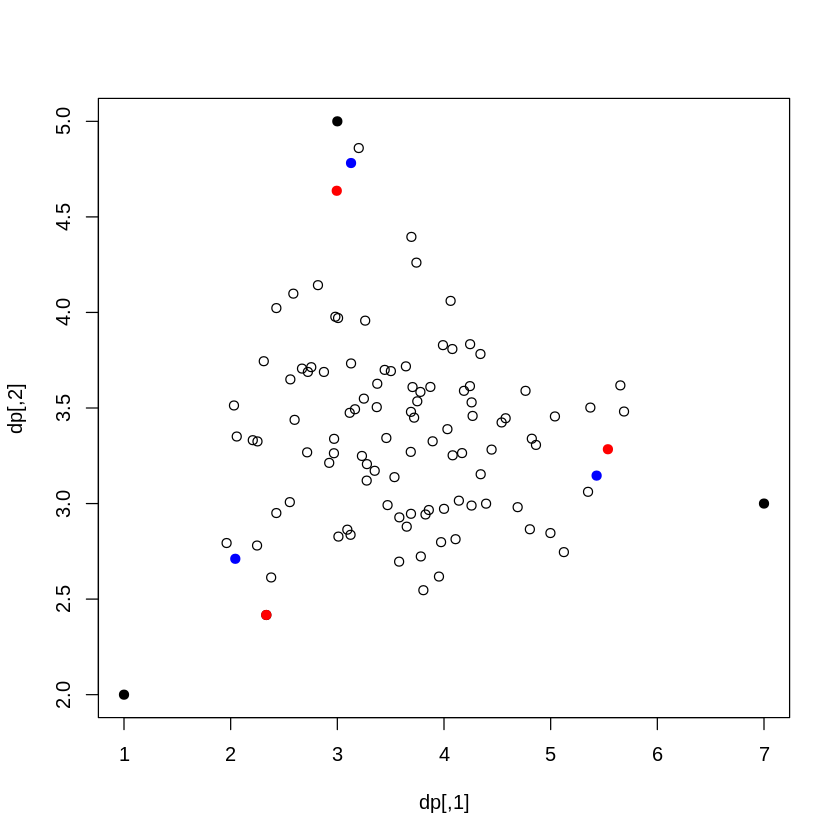

In [ ]:
suppressWarnings(plot(dp, colour = 'black', pch = 19))
points(df)
points(parameters(borrar_arch), col = 'red', pch = 19)
points(borrar_arch2$BY, col = 'blue', pch = 19)

In [ ]:
# Función para muestra aleatoria
generate_data <- function(n) {
  X <- rnorm(n, mean = 0, sd = 1)
  Y <- rnorm(n, mean = 0, sd = 1)
  data.frame(X = X, Y = Y)
}

In [ ]:
borrar = generate_data(700)

In [ ]:
tic()
set.seed(1234)
borrar_arch = archetypes(borrar, 3, verbose = TRUE)
toc()

1: rss = 0.01873108, improvement = 0.01932776
2: rss = 0.01277023, improvement = 0.00596085
3: rss = 0.00986987, improvement = 0.00290036
4: rss = 0.00868808, improvement = 0.00118179
5: rss = 0.00818371, improvement = 0.00050437
6: rss = 0.00791921, improvement = 0.00026451
7: rss = 0.00791282, improvement = 0.00000639
8: rss = 0.00794380, improvement = -0.00003098
0.334 sec elapsed


In [ ]:
borrar_arch$archetypes

X,Y
2.429226,1.678510
-2.887806,1.284682
0.704723,-3.009017


In [ ]:
# Probamos lo que es la iteración para múltiples cantidades de arquetipos, pero usando una pseudo-matriz inversa de Monroe-Penrose
# Este igual puede romper. De cualquier manera me

tic()
borrar_arch = stepArchetypes(data = borrar,
                             k = 1:10,
                             verbose = F,
                             family = archetypesFamily("original",
                             zalphasfn = archetypes:::ginv.zalphasfn),
                             nrep = 10)
toc()

75.594 sec elapsed


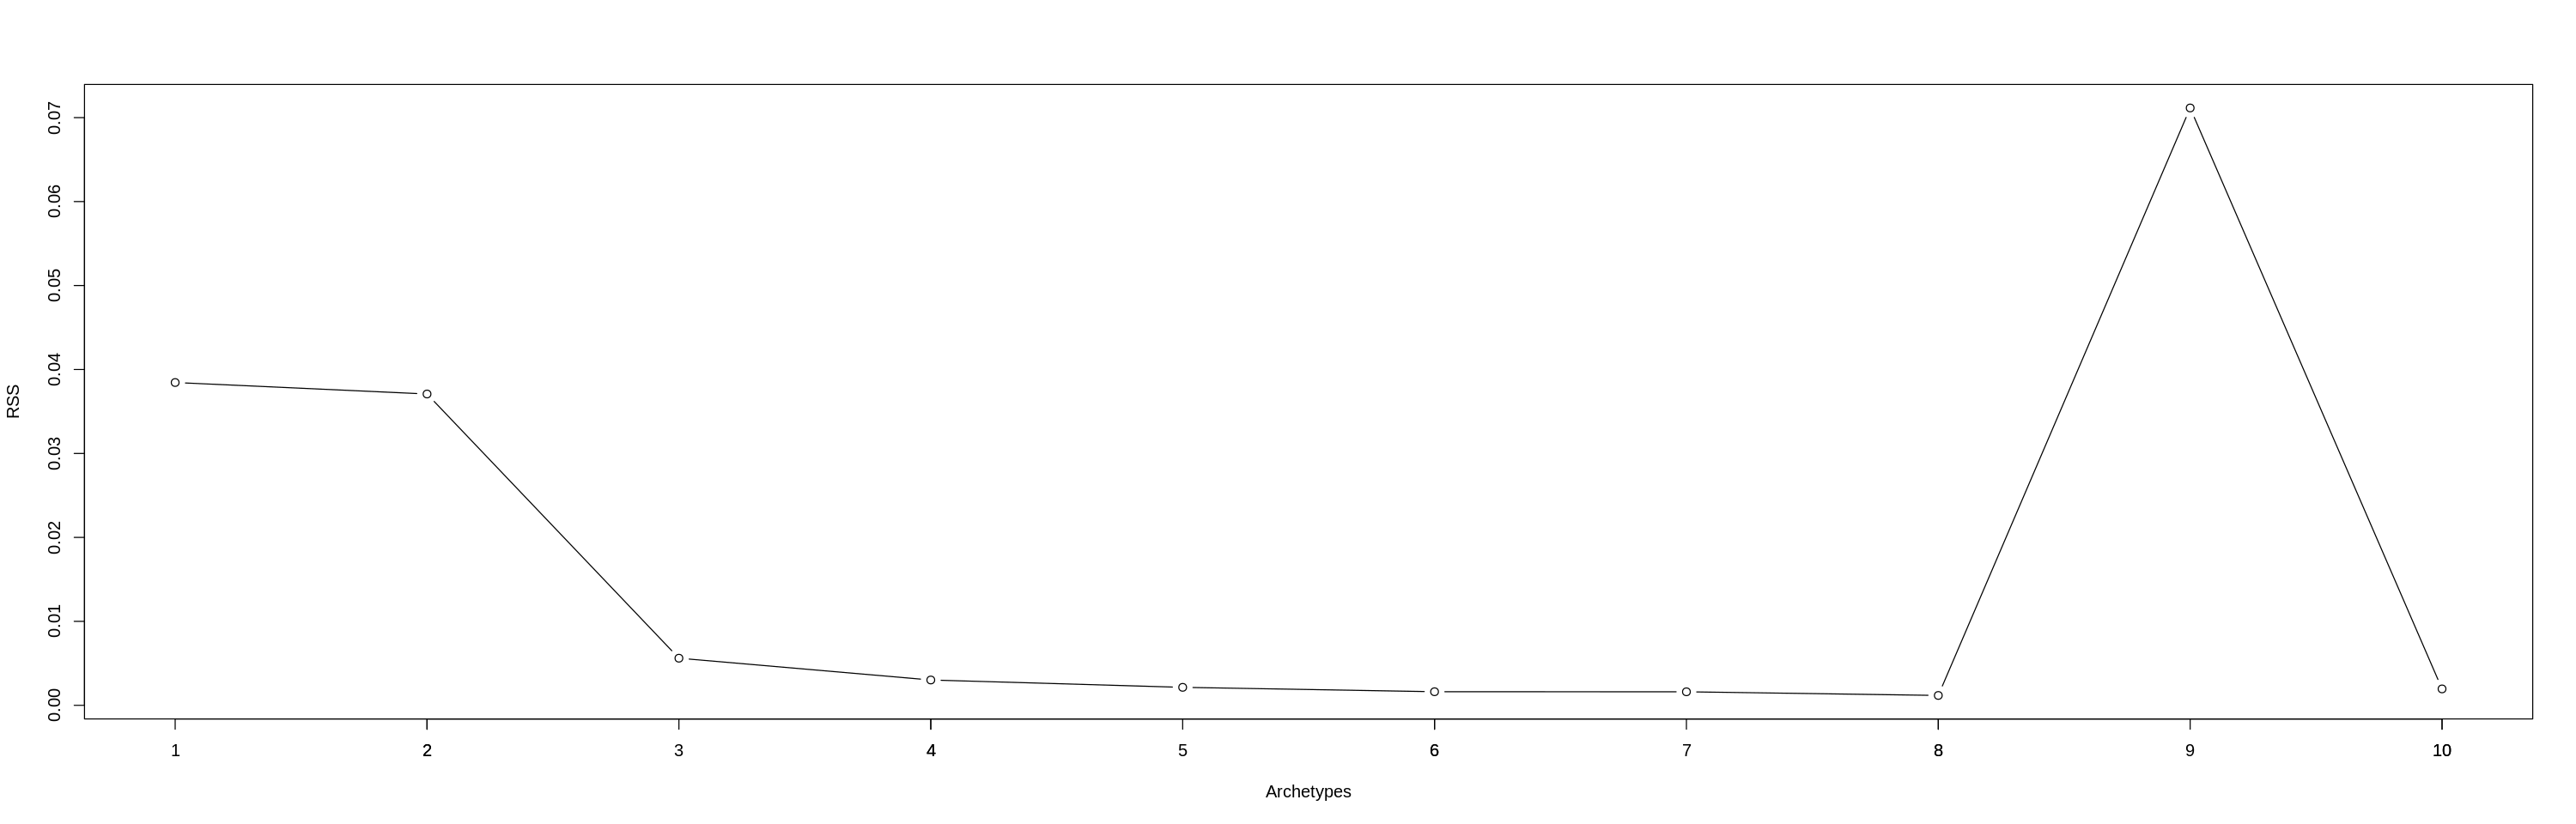

In [ ]:
screeplot(borrar_arch)

In [ ]:
tic()
borrar_arch2 = archetypal(df = borrar, kappas = 3, verbose = TRUE, rseed = 1234, save_history = FALSE)
toc()

Time for computing Projected Convex Hull was 0 secs



Next projected convex hull initial solution will be used... 
             X         Y
93   2.6159393  2.703124
294 -2.8078492 -1.582298
569 -0.7231944  3.008370
  
Time for the 25 initial A updates was 0.44 secs 
|-----|----------|--------------|------------|----------|----------|-------|-------|-------| 
  Iter|   VarExpl|          SSE | |dSSE|/SSE |       muB|       muA| t(sec)|Aup;dwn|Bup;dwn 
|-----|----------|--------------|------------|----------|----------|-------|-------|-------| 
    1 | 0.791820 | 2.853556e+02 |   1.74e+00 | 1.21e-02 | 1.44e-01 |   0.4 |  10;2 |  10;9 
    2 | 0.871748 | 1.757961e+02 |   6.23e-01 | 7.49e-02 | 1.12e-01 |   0.3 |  10;3 |  10;0 
    3 | 0.894587 | 1.444904e+02 |   2.17e-01 | 5.80e-02 | 1.73e-01 |   0.4 |  10;2 |  10;3 
    4 | 0.908704 | 1.251404e+02 |   1.55e-01 | 1.79e-01 | 1.34e-01 |   0.3 |  10;3 |  10;1 
    5 | 0.917664 | 1.128586e+02 |   1.09e-01 | 2.78e-01 | 1.03e-01 |   0.3 |  10;3 |  10;2 
    6 | 0.924553 | 1.034169e+02 |   9.13e-02 |

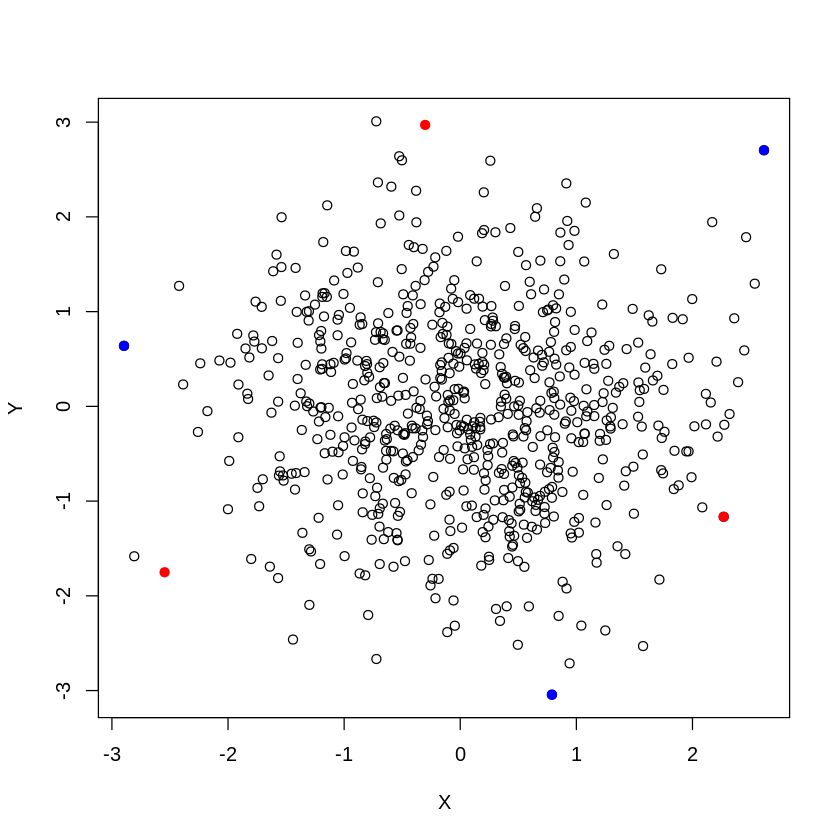

In [ ]:
suppressWarnings(plot(borrar))
points(parameters(borrar_arch), col = 'red', pch = 19)
points(borrar_arch2$BY, col = 'blue', pch = 19)

¿Qué pasa si probamos con muchas dimensiones?

In [ ]:
generate_data_bis <- function(n, dimensions) {
  data <- matrix(rnorm(n * dimensions), ncol = dimensions)
  colnames(data) <- paste0("V", 1:dimensions)
  as.data.frame(data)
}

In [ ]:
borrar = generate_data_bis(700,20)
head(borrar,3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4018243,1.3339115,2.9455846,-1.94489555,-0.7708685,-1.2286078,-0.26232927,0.8865628,-1.8380726,1.1906437,-1.8144565,0.6159244,-0.6616781,0.1449547,-0.5892825,0.1739843,0.3127876,1.7822885,0.9116255,0.8131083
2,0.4359741,0.7326495,-1.9580074,-0.02584908,-0.5681747,0.9144430,0.09558703,-0.3156922,0.6254472,-0.8245882,-0.7524731,-1.9150974,-1.6760067,-2.9902001,2.0158125,1.2597223,-1.2140736,-0.8606305,0.3601773,0.4674423
3,-0.4455946,0.4286050,0.9692084,0.96086914,0.2689001,-0.2125826,1.37683112,0.5238723,0.2309903,-1.0257763,0.6761647,0.3957089,0.4736085,-0.1050032,-1.2497862,-1.3479430,1.4643377,1.8943862,-0.5630132,-1.1829887


In [ ]:
tic()
set.seed(1234)
borrar_arch = archetypes(borrar,
                         20,
                         verbose = TRUE,
                         family = archetypesFamily("robust"))
toc()

1: rss = 0.04618490, improvement = 0.01039580
2: rss = 0.04484187, improvement = 0.00134303
3: rss = 0.04338349, improvement = 0.00145839
4: rss = 0.04243027, improvement = 0.00095322
5: rss = 0.04213808, improvement = 0.00029220
6: rss = 0.04209791, improvement = 0.00004017
7: rss = 0.04180060, improvement = 0.00029731
8: rss = 0.04160516, improvement = 0.00019543
9: rss = 0.04154295, improvement = 0.00006222
10: rss = 0.04144372, improvement = 0.00009923
11: rss = 0.04129294, improvement = 0.00015078
12: rss = 0.04108890, improvement = 0.00020404
13: rss = 0.04085372, improvement = 0.00023518
14: rss = 0.04070247, improvement = 0.00015126
15: rss = 0.04069297, improvement = 0.00000950
16: rss = 0.04071861, improvement = -0.00002564
3.18 sec elapsed


In [ ]:
tic()
set.seed(1234)
borrar_arch = archetypes(borrar, 3, verbose = TRUE)
toc()

1: rss = 0.04375798, improvement = 0.04936603
2: rss = 0.04324983, improvement = 0.00050814
3: rss = 0.04320676, improvement = 0.00004307
4: rss = 0.04317292, improvement = 0.00003385
5: rss = 0.04315130, improvement = 0.00002161
6: rss = 0.04311570, improvement = 0.00003560
7: rss = 0.04308574, improvement = 0.00002995
8: rss = 0.04306907, improvement = 0.00001667
9: rss = 0.04305454, improvement = 0.00001453
10: rss = 0.04304458, improvement = 0.00000996
11: rss = 0.04303611, improvement = 0.00000847
12: rss = 0.04302846, improvement = 0.00000765
13: rss = 0.04302295, improvement = 0.00000551
14: rss = 0.04301758, improvement = 0.00000536
15: rss = 0.04301249, improvement = 0.00000509
16: rss = 0.04300637, improvement = 0.00000612
17: rss = 0.04299955, improvement = 0.00000682
18: rss = 0.04299267, improvement = 0.00000688
19: rss = 0.04298874, improvement = 0.00000393
20: rss = 0.04299144, improvement = -0.00000270
1.346 sec elapsed


In [ ]:
tic()
borrar_arch2 = archetypal(df = borrar, kappas = 3, verbose = TRUE, rseed = 1234, save_history = FALSE)
toc()

Time for computing Projected Convex Hull was 0.79 secs



Next projected convex hull initial solution will be used... 
            V1         V2       V3         V4          V5        V6         V7
657 -0.3549118  0.1015284 0.167131 -1.1147606 -1.90564885 -1.888686  0.8114993
345  1.4868088  0.1095184 0.782248 -0.2213346 -0.08746881  0.507946 -2.5700160
358  0.5580242 -2.8995025 1.540489  0.8193001 -1.64890873 -1.775257  2.3484082
            V8         V9         V10        V11        V12         V13
657 -2.2418818  1.0283348  0.80668326 -2.4422491  0.1732888 -0.05886021
345 -0.2912638 -0.8523680  0.03055762 -0.1301644 -0.1361611  3.08058203
358 -2.0944671  0.3711506 -0.15412938  0.8236690  0.7325730  1.94847690
           V14       V15       V16        V17        V18        V19        V20
657 -1.3431137  3.665452 0.7357999  1.1150531 -0.3503535 0.86365933  0.6212535
345  1.4686822 -2.105327 2.5861110 -0.9316233  0.5813018 1.66568642 -2.1101067
358  0.9369756 -1.899332 0.8781725 -0.1216652  0.6066350 0.09146042  0.7434234
  
Time for the 25 

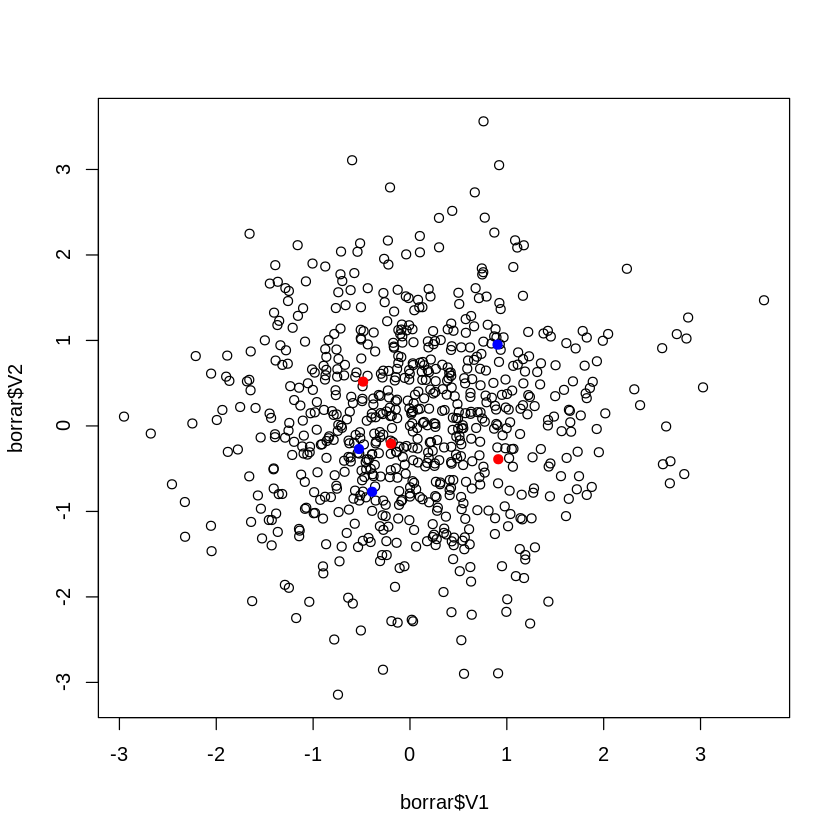

In [ ]:
suppressWarnings(plot(borrar$V1, borrar$V2))
points(data.frame(parameters(borrar_arch))$V1, data.frame(parameters(borrar_arch))$V2, col = 'red', pch = 19)
points(data.frame(borrar_arch2$BY)$V1, data.frame(borrar_arch2$BY)$V2, col = 'blue', pch = 19)

Vemos que evidentemente tenemos una ganancia en tiempos. Luego, **de aquí en más ajustaremos todo para usar la librería archetypes.**

Cambiamos incialmente la cantidad de datos, dejando las dimensiones fijas en dos.

In [ ]:
# Ya las llamamos arriba, pero es para mapear lo que vamos usando
# library("archetypal")
# library("microbenchmark")
# library("ggplot2")

In [ ]:
# Función para muestra aleatoria
generate_data <- function(n) {
  X <- rnorm(n, mean = 0, sd = 3)
  Y <- rnorm(n, mean = 0, sd = 3)
  data.frame(X = X, Y = Y)
}

Tenemos un problema con el caso de inversión de matrices singulares. Vamos a usar la **matriz pseudo-inversa de Moore-Penrose**:

As we mentioned in Section 2, there are many ways to solve linear equation systems. One
other possibility is the Moore-Penrose pseudoinverse:

*We use the ginv() function from the MASS package to calculate the pseudoinverse. The function ignores ill-conditioned matrices and “just solves the linear equation system”, but the archetypes function throws warnings of ill-conditioned matrices if the matrix condition number κ is bigger than an upper bound (default is maxKappa = 1000):[...]*



In [ ]:
# Definimos:
# - Tamaños de las muestras
# - # de arquetipos a calcular
# - Semilla para garantizar reproductibilidad

sample_sizes <- c(300, 500, 1000, 5000, 10000)
archetypes_list <- c(2,3,4,5,6,7,8,9,10,15,20)
seed <- 123

In [ ]:
# Función para medir el tiempo con manejo de advertencias y errores
measure_time <- function(df, num_archetypes, seed) {
  time_result <- tryCatch({
    times <- microbenchmark(
      {
        set.seed(seed)
        # archetypal(df = df, kappas = num_archetypes, verbose = FALSE, rseed = seed, save_history = FALSE) # "Verbose" es para que te haga print de los resultados
        # archetypes(data = df, k = num_archetypes, verbose = FALSE) # Esta es la alternativa que estábamos probando
        archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", zalphasfn = archetypes:::ginv.zalphasfn)) # Usamos la pseudoinversa de Moore-Penrose
      },
      times = 1
    )
    median(times$time) / 1e9  # De nanosegundos a segundos
  }, warning = function(w) {
    message("Warning encountered: ", w)
    NA  # Devuelve NA si se encuentra una advertencia
  }, error = function(e) {
    message("Error encountered: ", e)
    NA  # Devuelve NA si se encuentra un error
  })

  return(time_result)
}


In [ ]:
# Inicializamos el loop
tic()
results <- data.frame()

# Combinamos la muestra con la cantidad de arquetipos
for (n in sample_sizes) {
  df <- generate_data(n)
  for (arc in archetypes_list) {
    cat("// Muestra: ", n, " - ", "Cantidad de Arquetipos: ", arc, "Errores: ")
    time_taken <- measure_time(df, arc, seed)
    results <- rbind(results, data.frame(SampleSize = n, Archetypes = arc, Time = time_taken))
  }
}
# Esto con la librería archetypal tardaba ~5065.692 segundos. Esto fue con 7 variantes en cantidades de arquetipos.
# Ahora me tarda ~233.801 segundos, pero con muchos errores de matrices singulares en el medio. Esto fue con 11 variantes en cantidades de arquetipos.
# En el caso de usar la pseudo-inversa de Moore-Penrose, me tarda ~238.879 segundos (familia de arquetipos "original")

# (https://www.researchgate.net/post/What_is_the_most_efficient_way_for_computing_Archetypal_Analysis)
toc()

// Muestra:  300  -  Cantidad de Arquetipos:  2 Errores: // Muestra:  300  -  Cantidad de Arquetipos:  3 Errores: // Muestra:  300  -  Cantidad de Arquetipos:  4 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=4: alphas > maxKappa




// Muestra:  300  -  Cantidad de Arquetipos:  5 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=5: alphas > maxKappa




// Muestra:  300  -  Cantidad de Arquetipos:  6 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=6: alphas > maxKappa




// Muestra:  300  -  Cantidad de Arquetipos:  7 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=7: alphas > maxKappa




// Muestra:  300  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=8: alphas, betas > maxKappa




// Muestra:  300  -  Cantidad de Arquetipos:  9 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=9: alphas, betas > maxKappa




// Muestra:  300  -  Cantidad de Arquetipos:  10 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=10: alphas, betas > maxKappa




// Muestra:  300  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=15: alphas, betas > maxKappa




// Muestra:  300  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=20: alphas, betas > maxKappa




// Muestra:  500  -  Cantidad de Arquetipos:  2 Errores: // Muestra:  500  -  Cantidad de Arquetipos:  3 Errores: // Muestra:  500  -  Cantidad de Arquetipos:  4 Errores: // Muestra:  500  -  Cantidad de Arquetipos:  5 Errores: // Muestra:  500  -  Cantidad de Arquetipos:  6 Errores: // Muestra:  500  -  Cantidad de Arquetipos:  7 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=7: alphas > maxKappa




// Muestra:  500  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=8: alphas > maxKappa




// Muestra:  500  -  Cantidad de Arquetipos:  9 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=9: alphas > maxKappa




// Muestra:  500  -  Cantidad de Arquetipos:  10 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=10: alphas > maxKappa




// Muestra:  500  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=15: alphas, betas > maxKappa




// Muestra:  500  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=20: alphas, betas > maxKappa




// Muestra:  1000  -  Cantidad de Arquetipos:  2 Errores: // Muestra:  1000  -  Cantidad de Arquetipos:  3 Errores: // Muestra:  1000  -  Cantidad de Arquetipos:  4 Errores: // Muestra:  1000  -  Cantidad de Arquetipos:  5 Errores: // Muestra:  1000  -  Cantidad de Arquetipos:  6 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=6: alphas > maxKappa




// Muestra:  1000  -  Cantidad de Arquetipos:  7 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=7: alphas > maxKappa




// Muestra:  1000  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=8: alphas > maxKappa




// Muestra:  1000  -  Cantidad de Arquetipos:  9 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=9: alphas > maxKappa




// Muestra:  1000  -  Cantidad de Arquetipos:  10 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=10: alphas > maxKappa




// Muestra:  1000  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=15: alphas > maxKappa




// Muestra:  1000  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=20: alphas > maxKappa




// Muestra:  5000  -  Cantidad de Arquetipos:  2 Errores: // Muestra:  5000  -  Cantidad de Arquetipos:  3 Errores: // Muestra:  5000  -  Cantidad de Arquetipos:  4 Errores: // Muestra:  5000  -  Cantidad de Arquetipos:  5 Errores: // Muestra:  5000  -  Cantidad de Arquetipos:  6 Errores: // Muestra:  5000  -  Cantidad de Arquetipos:  7 Errores: // Muestra:  5000  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=8: alphas > maxKappa




// Muestra:  5000  -  Cantidad de Arquetipos:  9 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=9: alphas > maxKappa




// Muestra:  5000  -  Cantidad de Arquetipos:  10 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=10: alphas > maxKappa




// Muestra:  5000  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=15: alphas > maxKappa




// Muestra:  5000  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=20: alphas > maxKappa




// Muestra:  10000  -  Cantidad de Arquetipos:  2 Errores: // Muestra:  10000  -  Cantidad de Arquetipos:  3 Errores: // Muestra:  10000  -  Cantidad de Arquetipos:  4 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=4: alphas > maxKappa




// Muestra:  10000  -  Cantidad de Arquetipos:  5 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=5: alphas > maxKappa




// Muestra:  10000  -  Cantidad de Arquetipos:  6 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=6: alphas > maxKappa




// Muestra:  10000  -  Cantidad de Arquetipos:  7 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=7: alphas > maxKappa




// Muestra:  10000  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=8: alphas > maxKappa




// Muestra:  10000  -  Cantidad de Arquetipos:  9 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=9: alphas > maxKappa




// Muestra:  10000  -  Cantidad de Arquetipos:  10 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=10: alphas > maxKappa




// Muestra:  10000  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=15: alphas > maxKappa




// Muestra:  10000  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", : k=20: alphas > maxKappa




543.989 sec elapsed


In [ ]:
arch_computables <- results %>%
                    group_by(SampleSize) %>%
                    filter(!is.na(Time)) %>%
                    summarize("Máximo de Arquetipos Computables" = max(Archetypes, na.rm = TRUE))

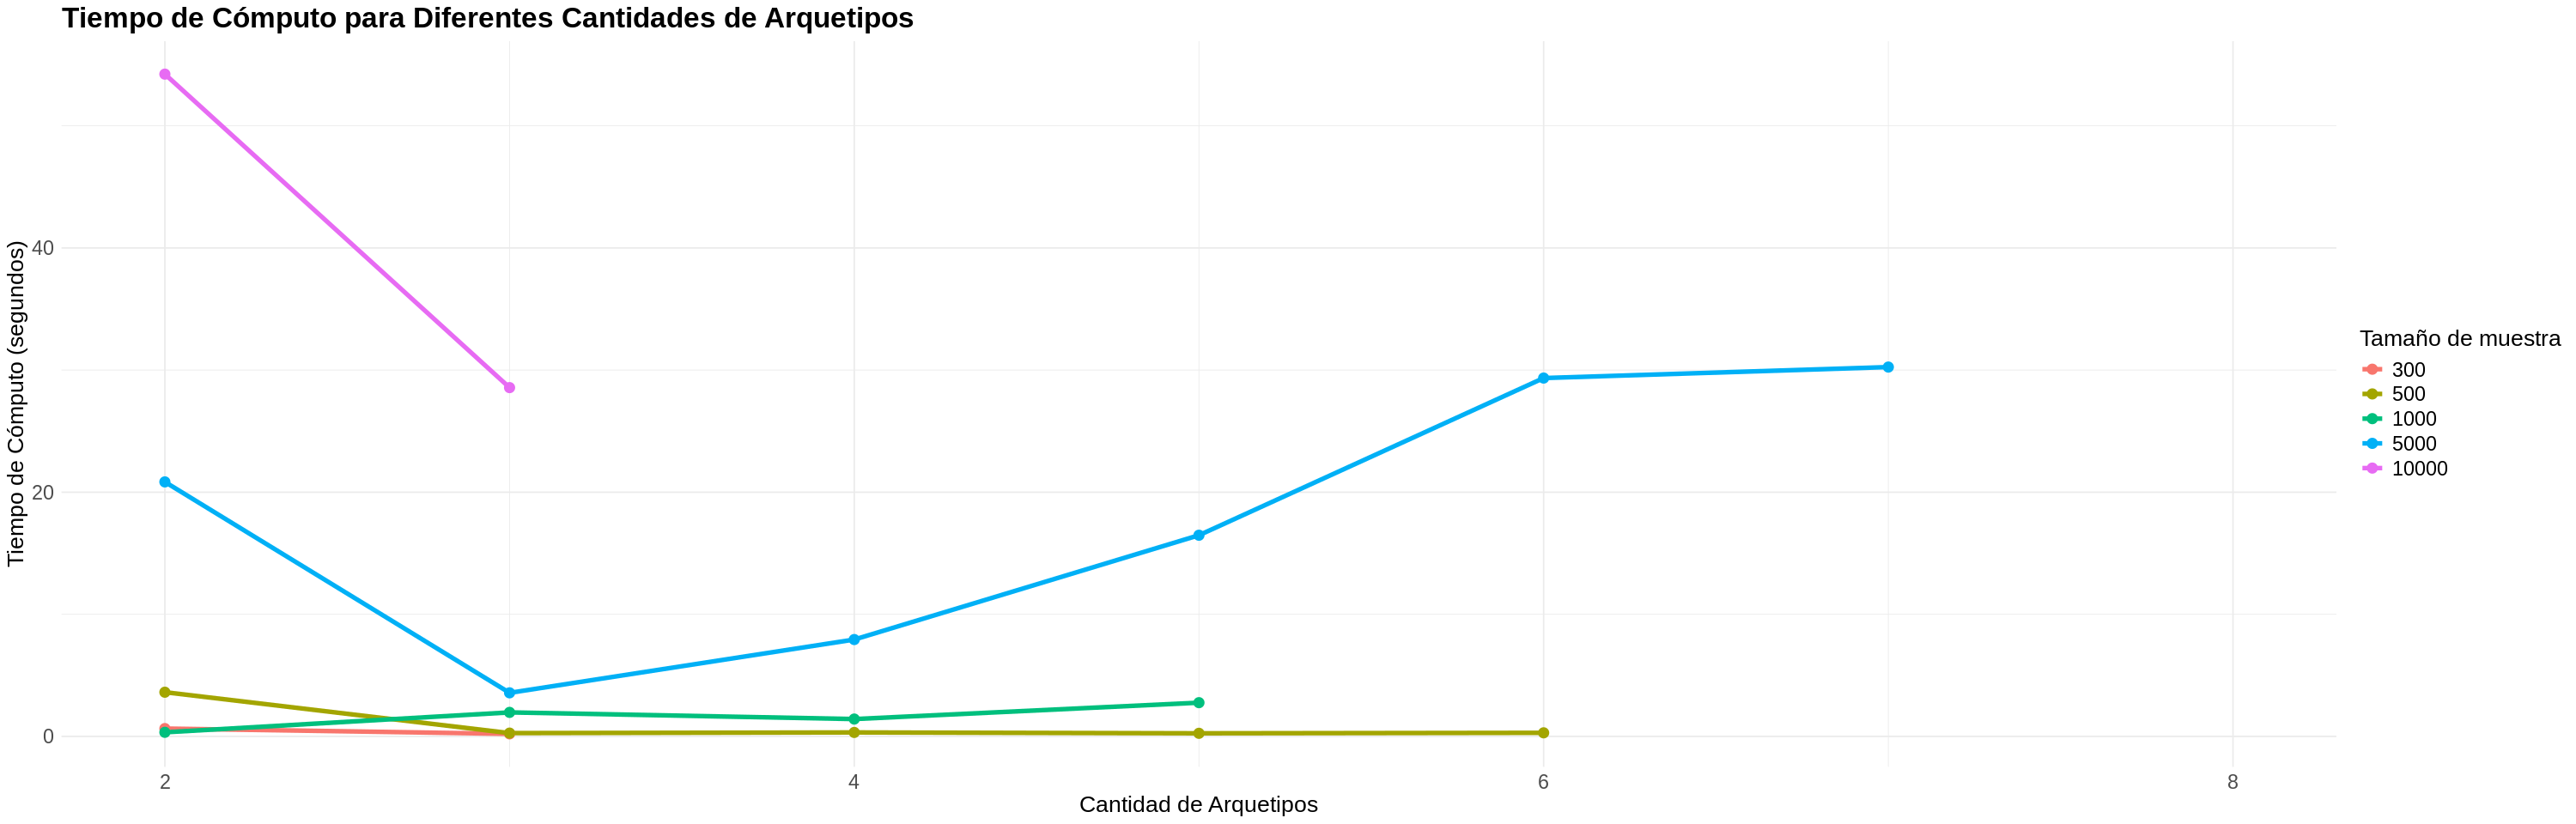

In [ ]:
# Esto es usando la matriz pseudo inversa de Moore-Penrose

# Graficamos los resultados
options(warn = -1) # Silenciamos además los warnings
options(repr.plot.width = 25, repr.plot.height = 8)

ggplot(results, aes(x = Archetypes, y = Time, color = as.factor(SampleSize))) +
  geom_line(size = 1.5) +  # Increase line thickness
  geom_point(size = 3) +   # Increase point size
  labs(title = "Tiempo de Cómputo para Diferentes Cantidades de Arquetipos",
       x = "Cantidad de Arquetipos",
       y = "Tiempo de Cómputo (segundos)",
       color = "Tamaño de muestra") +
  coord_cartesian(xlim = c(2, 8)) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

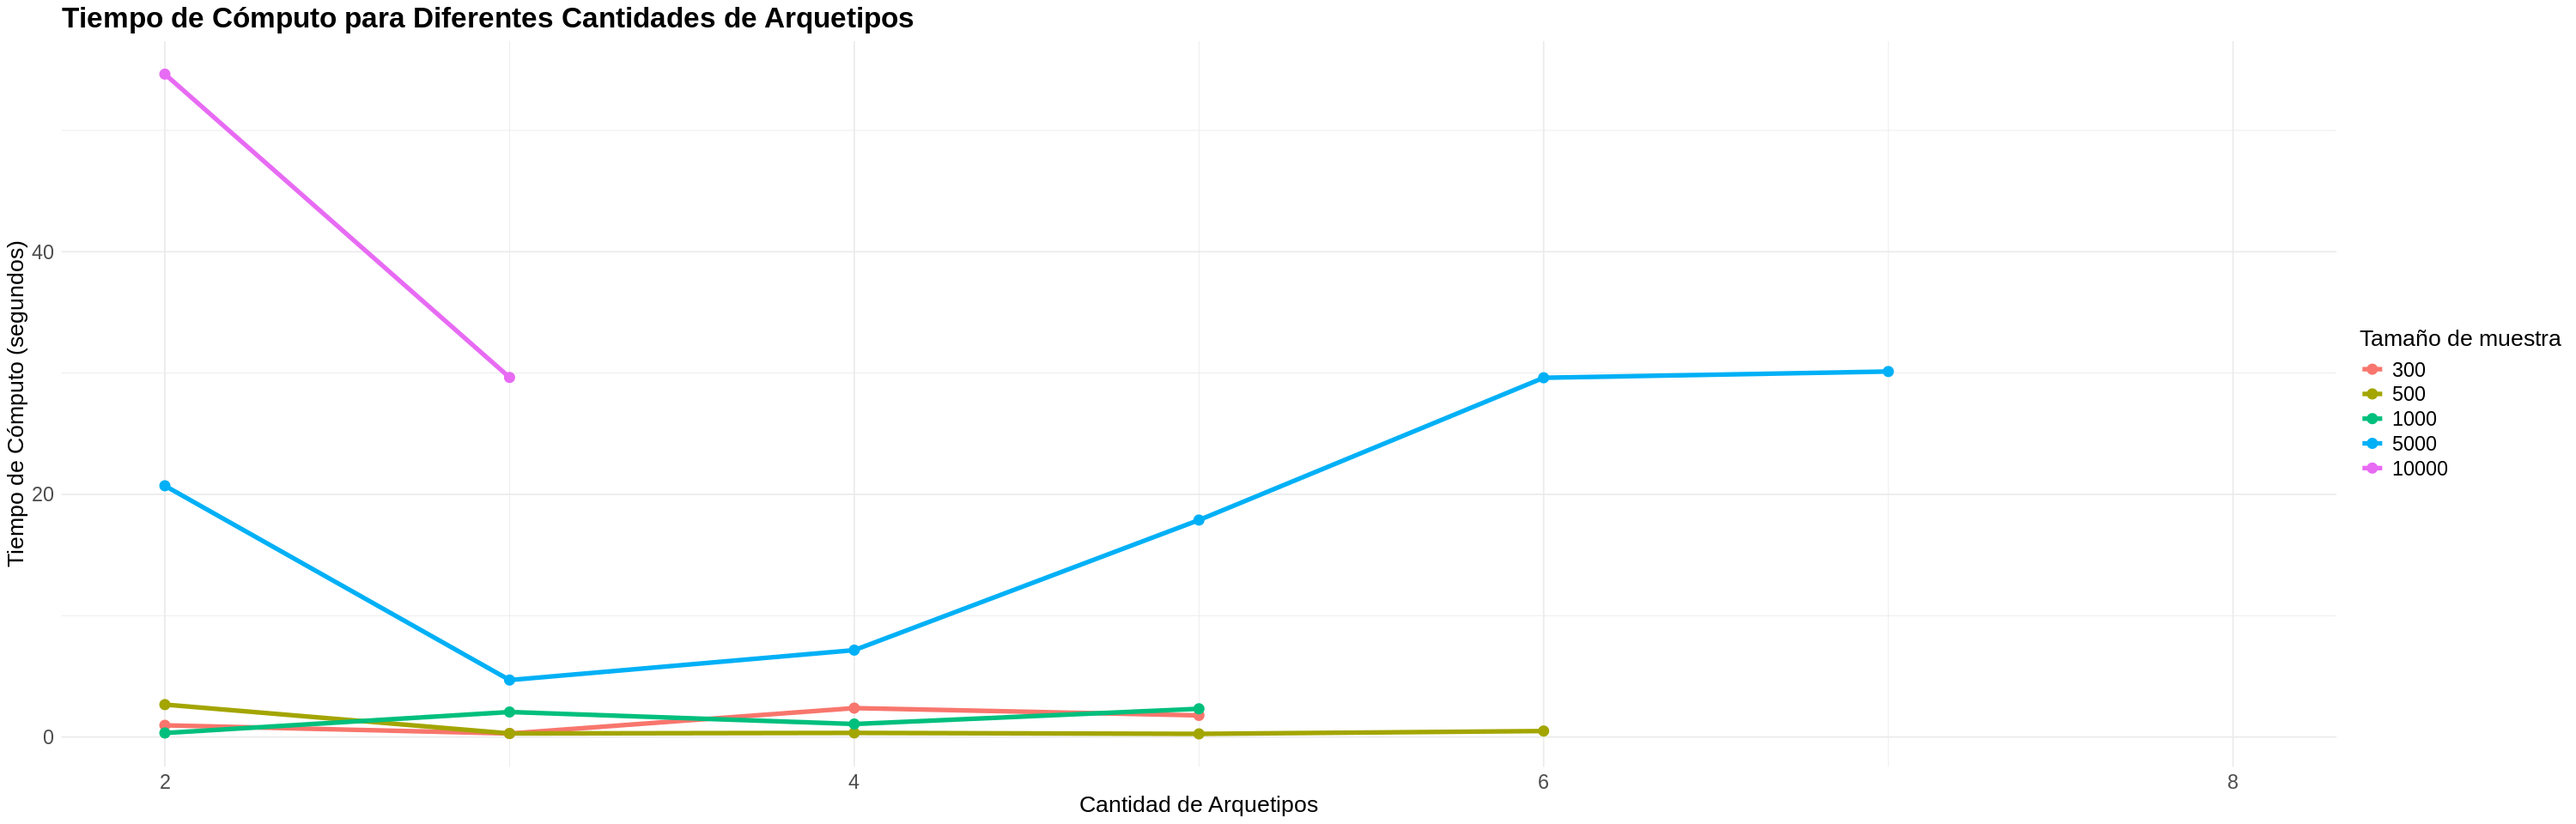

In [ ]:
# Esto es usando la matriz inversa

# Graficamos los resultados
options(warn = -1) # Silenciamos además los warnings
options(repr.plot.width = 25, repr.plot.height = 8)

ggplot(results, aes(x = Archetypes, y = Time, color = as.factor(SampleSize))) +
  geom_line(size = 1.5) +  # Increase line thickness
  geom_point(size = 3) +   # Increase point size
  labs(title = "Tiempo de Cómputo para Diferentes Cantidades de Arquetipos",
       x = "Cantidad de Arquetipos",
       y = "Tiempo de Cómputo (segundos)",
       color = "Tamaño de muestra") +
  coord_cartesian(xlim = c(2, 8)) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

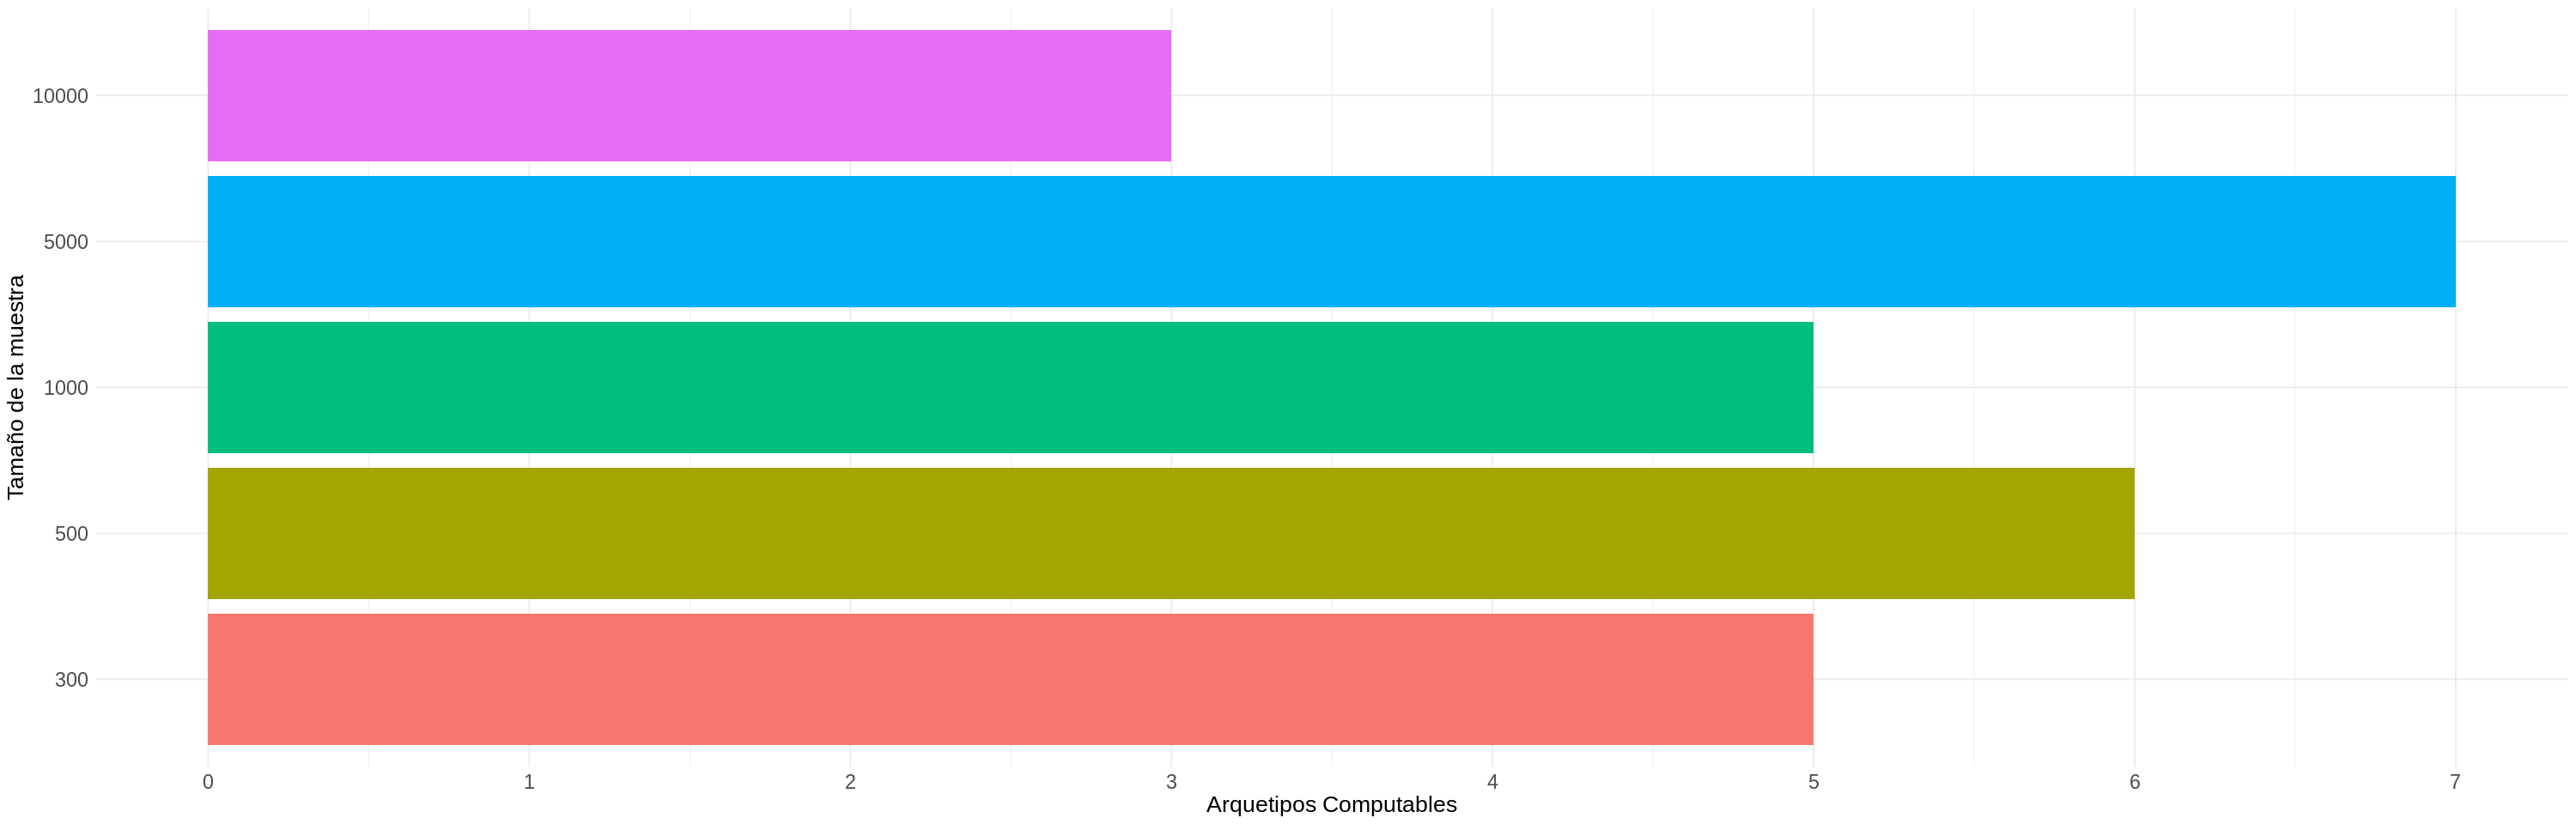

In [ ]:
# Vemos arquetipos computables
ggplot(arch_computables, aes(x = arch_computables$`Máximo de Arquetipos Computables`, y = factor(SampleSize))) +
  geom_bar(stat = "identity", aes(fill = factor(SampleSize))) +
  labs(x = "Arquetipos Computables", y = "Tamaño de la muestra") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:8) +  # Define los valores del eje X
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.position = "none"  # Elimina la leyenda
  )

Ahora vamos modificando la cantidad de dimensiones, dejando la cantidad de observaciones fija en trescientas.

In [ ]:
# Funciones para generar la información y además para medir el tiempo
generate_data_bis <- function(n, dimensions) {
  data <- matrix(rnorm(n * dimensions), ncol = dimensions)
  colnames(data) <- paste0("V", 1:dimensions)
  as.data.frame(data)
}

In [ ]:
# Definimos:
# - Tamaños de las muestras
# - # de arquetipos a calcular
# - Cantidad de dimensiones
# - Semilla para garantizar reproductibilidad

sample_size <- 300
archetypes_list <- c(2,3,4,5,6,7,8,9,10,15,20)
dimensions_list <- c(2, 3, 4, 5, 10, 20,5,100)
seed <- 123

In [ ]:
# Inicializamos el loop
tic()
set.seed(seed)
results <- data.frame()

# Cruzamos las dimensiones con la cantidad de arquetipos
for (d in dimensions_list) {
  df <- generate_data_bis(sample_size, d)
  for (arc in archetypes_list) {
    cat("// Dimensión: ", d, " - ", "Cantidad de Arquetipos: ", arc, "Errores: ")
    time_taken <- measure_time(df, arc, seed)
    results <- rbind(results, data.frame(Dimensions = d, Archetypes = arc, Time = time_taken))
  }
}
# Esto con la librería archetypal tardaba ~3391.382 segundos . Esto fue con 7 variantes en cantidades de arquetipos.
# Ahora me tarda ~88.573 segundos, pero con muchos errores de matrices singulares en el medio. Esto fue con 11 variantes en cantidades de arquetipos.
# (https://www.researchgate.net/post/What_is_the_most_efficient_way_for_computing_Archetypal_Analysis)
toc()

// Dimensión:  2  -  Cantidad de Arquetipos:  2 Errores: // Dimensión:  2  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  2  -  Cantidad de Arquetipos:  4 Errores: // Dimensión:  2  -  Cantidad de Arquetipos:  5 Errores: // Dimensión:  2  -  Cantidad de Arquetipos:  6 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=6: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  2  -  Cantidad de Arquetipos:  7 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=7: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  2  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=8: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  2  -  Cantidad de Arquetipos:  9 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=9: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  2  -  Cantidad de Arquetipos:  10 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=10: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  2  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=15: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  2  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=20: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  3  -  Cantidad de Arquetipos:  2 Errores: // Dimensión:  3  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  3  -  Cantidad de Arquetipos:  4 Errores: // Dimensión:  3  -  Cantidad de Arquetipos:  5 Errores: // Dimensión:  3  -  Cantidad de Arquetipos:  6 Errores: // Dimensión:  3  -  Cantidad de Arquetipos:  7 Errores: // Dimensión:  3  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=8: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  3  -  Cantidad de Arquetipos:  9 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=9: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  3  -  Cantidad de Arquetipos:  10 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=10: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  3  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=15: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  3  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=20: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  4  -  Cantidad de Arquetipos:  2 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  4 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  5 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  6 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  7 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=8: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  4  -  Cantidad de Arquetipos:  9 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  10 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=15: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  4  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=20: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  5  -  Cantidad de Arquetipos:  2 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  4 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  5 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  6 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  7 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=8: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  5  -  Cantidad de Arquetipos:  9 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  10 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=15: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  5  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=20: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  10  -  Cantidad de Arquetipos:  2 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  4 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  5 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  6 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  7 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=8: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  10  -  Cantidad de Arquetipos:  9 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  10 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=15: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  10  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=20: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  20  -  Cantidad de Arquetipos:  2 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  4 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  5 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  6 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  7 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=8: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  20  -  Cantidad de Arquetipos:  9 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  10 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=15: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  20  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=20: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  50  -  Cantidad de Arquetipos:  2 Errores: // Dimensión:  50  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  50  -  Cantidad de Arquetipos:  4 Errores: // Dimensión:  50  -  Cantidad de Arquetipos:  5 Errores: // Dimensión:  50  -  Cantidad de Arquetipos:  6 Errores: // Dimensión:  50  -  Cantidad de Arquetipos:  7 Errores: // Dimensión:  50  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=8: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  50  -  Cantidad de Arquetipos:  9 Errores: // Dimensión:  50  -  Cantidad de Arquetipos:  10 Errores: // Dimensión:  50  -  Cantidad de Arquetipos:  15 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=15: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  50  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=20: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  100  -  Cantidad de Arquetipos:  2 Errores: // Dimensión:  100  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  100  -  Cantidad de Arquetipos:  4 Errores: // Dimensión:  100  -  Cantidad de Arquetipos:  5 Errores: // Dimensión:  100  -  Cantidad de Arquetipos:  6 Errores: // Dimensión:  100  -  Cantidad de Arquetipos:  7 Errores: // Dimensión:  100  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=8: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  100  -  Cantidad de Arquetipos:  9 Errores: // Dimensión:  100  -  Cantidad de Arquetipos:  10 Errores: // Dimensión:  100  -  Cantidad de Arquetipos:  15 Errores: // Dimensión:  100  -  Cantidad de Arquetipos:  20 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=20: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





88.573 sec elapsed


In [ ]:
arch_computables <- results %>%
                    group_by(Dimensions) %>%
                    filter(!is.na(Time)) %>%
                    summarize("Máximo de Arquetipos Computables" = max(Archetypes, na.rm = TRUE))

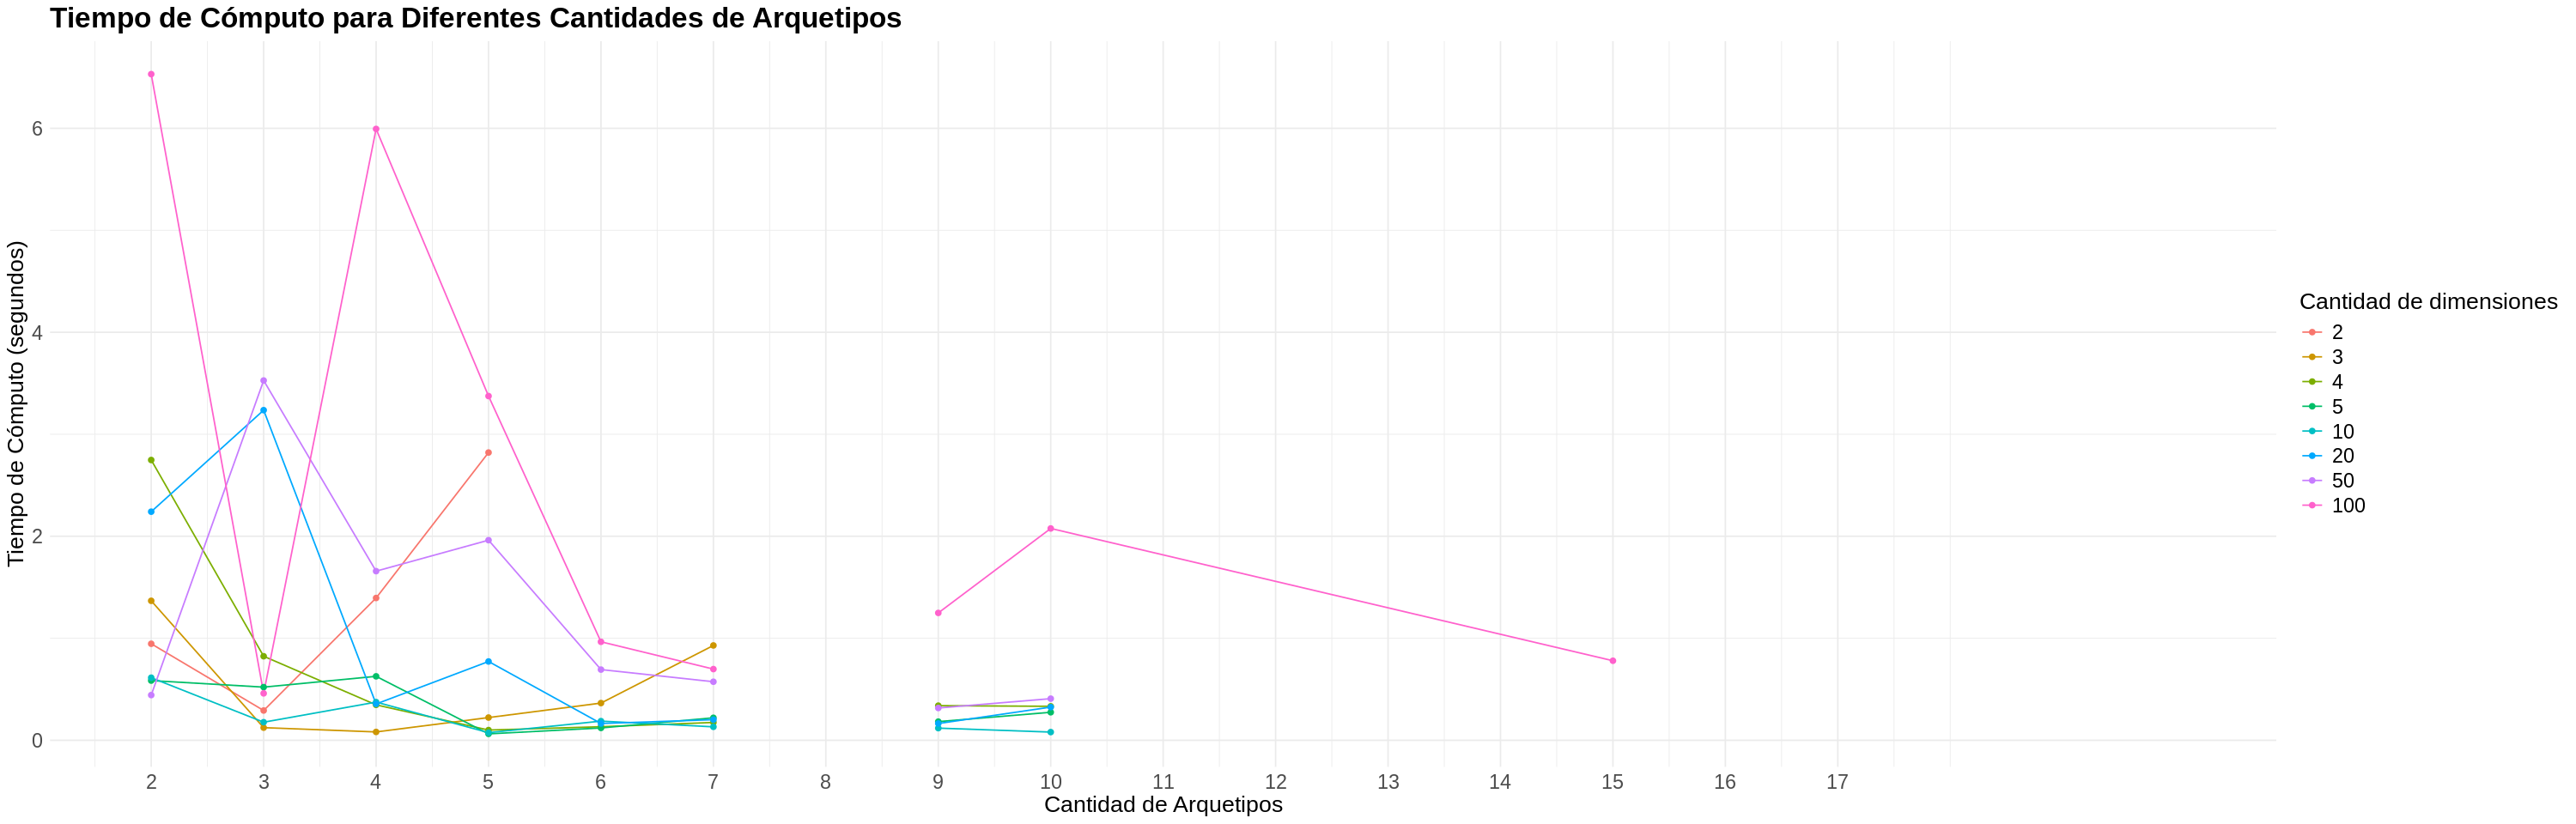

In [ ]:
# Graficamos los resultados
options(warn = -1) # Silenciamos además los warnings
options(repr.plot.width = 25, repr.plot.height = 8)

ggplot(results, aes(x = Archetypes, y = Time, color = as.factor(Dimensions))) +
  geom_line() +
  geom_point() +
  labs(title = "Tiempo de Cómputo para Diferentes Cantidades de Arquetipos",
       x = "Cantidad de Arquetipos",
       y = "Tiempo de Cómputo (segundos)",
       color = "Cantidad de dimensiones") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:17) +  # Define los valores del eje X
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

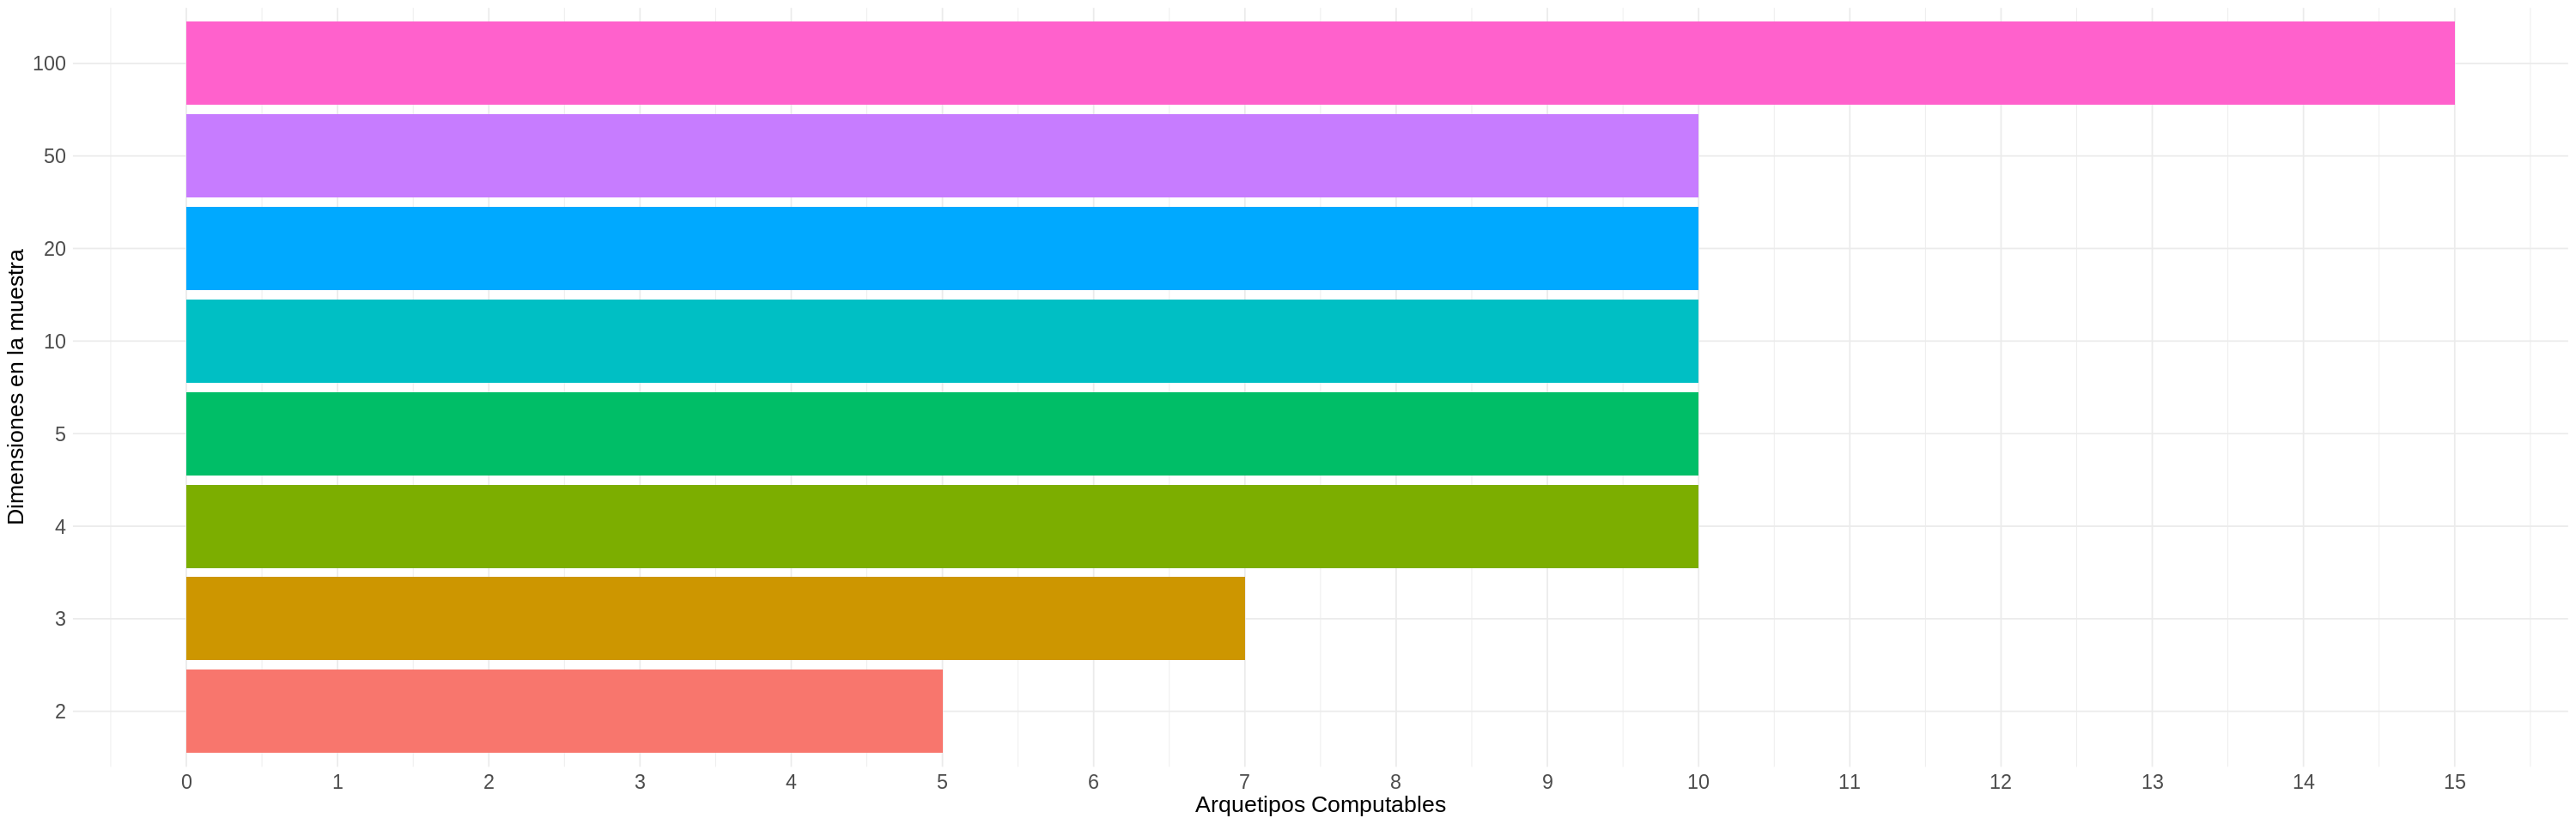

In [ ]:
# Vemos arquetipos computables
ggplot(arch_computables, aes(x = arch_computables$`Máximo de Arquetipos Computables`, y = factor(Dimensions))) +
  geom_bar(stat = "identity", aes(fill = factor(Dimensions))) +
  labs(x = "Arquetipos Computables", y = "Dimensiones en la muestra") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:17) +  # Define los valores del eje X
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.position = "none"  # Elimina la leyenda
  )

Vemos que en muchos casos, al tratarse de un procesimiento que detrás está computando inversa de matrices, cuando llevamos a elevar mucho la cantidad de arquetipos en un contexto donde las observaciones son muy parecidas terminamos recayendo en una matriz prácticamente singular. Es por es eso que pensamos, en función de los gráficos de arriba en una heurística que trate de ser estable en cuando varía tanto el tamaño de la muestra como las dimensiones.

In [ ]:
# Función para muestra aleatoria en dimensiones arbitrarias
generate_data_bis_2 <- function(n, dims) {
  data <- as.data.frame(matrix(rnorm(n * dims), ncol = dims))
  colnames(data) <- paste0("V", 1:dims)
  return(data)
}

In [ ]:
# Definimos:
# - Tamaño de la muestra (fijo)
# - # de dimensiones
# - Semilla para garantizar reproductibilidad

sample_size <- 300
dimensions_list <- c(2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 50, 60) # Hasta 100 no hay chances de que corra
seed <- 123

In [ ]:
# Inicializamos el loop
tic()
set.seed(seed)
results <- data.frame()

# Combinamos la cantidad de dimensiones y arquetipos
for (dims in dimensions_list) {
  df <- generate_data_bis_2(sample_size, dims)
  archetypes <- dims + 1  # "x" dimesiones  y "x+1" arquetipos
  cat("// Dimensión: ", dims, " - ", "Cantidad de Arquetipos: ", archetypes, "Errores: ")
  time_taken <- measure_time(df, archetypes, seed)
  results <- rbind(results, data.frame(Dimensions = dims, Archetypes = archetypes, Time = time_taken))
}
# Esto antes tardaba ~321.224 segundos, usando la librería "archetypal"
# Ahora tarda ~8.61 segundos.
toc()

// Dimensión:  2  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  3  -  Cantidad de Arquetipos:  4 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  5 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  6 Errores: // Dimensión:  6  -  Cantidad de Arquetipos:  7 Errores: // Dimensión:  7  -  Cantidad de Arquetipos:  8 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=8: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  8  -  Cantidad de Arquetipos:  9 Errores: // Dimensión:  9  -  Cantidad de Arquetipos:  10 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  11 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  21 Errores: 

Warning encountered: simpleWarning in archetypes(data = df, k = num_archetypes, verbose = FALSE): k=21: Error in qr.solve(alphas %*% t(alphas)): singular matrix 'a' in solve





// Dimensión:  40  -  Cantidad de Arquetipos:  41 Errores: 

Error encountered: Error in .kappa_tri(R, ...): NA/NaN/Inf in foreign function call (arg 1)




// Dimensión:  50  -  Cantidad de Arquetipos:  51 Errores: 

Error encountered: Error in .kappa_tri(R, ...): NA/NaN/Inf in foreign function call (arg 1)




// Dimensión:  60  -  Cantidad de Arquetipos:  61 Errores: 

Error encountered: Error in .kappa_tri(R, ...): NA/NaN/Inf in foreign function call (arg 1)




8.046 sec elapsed


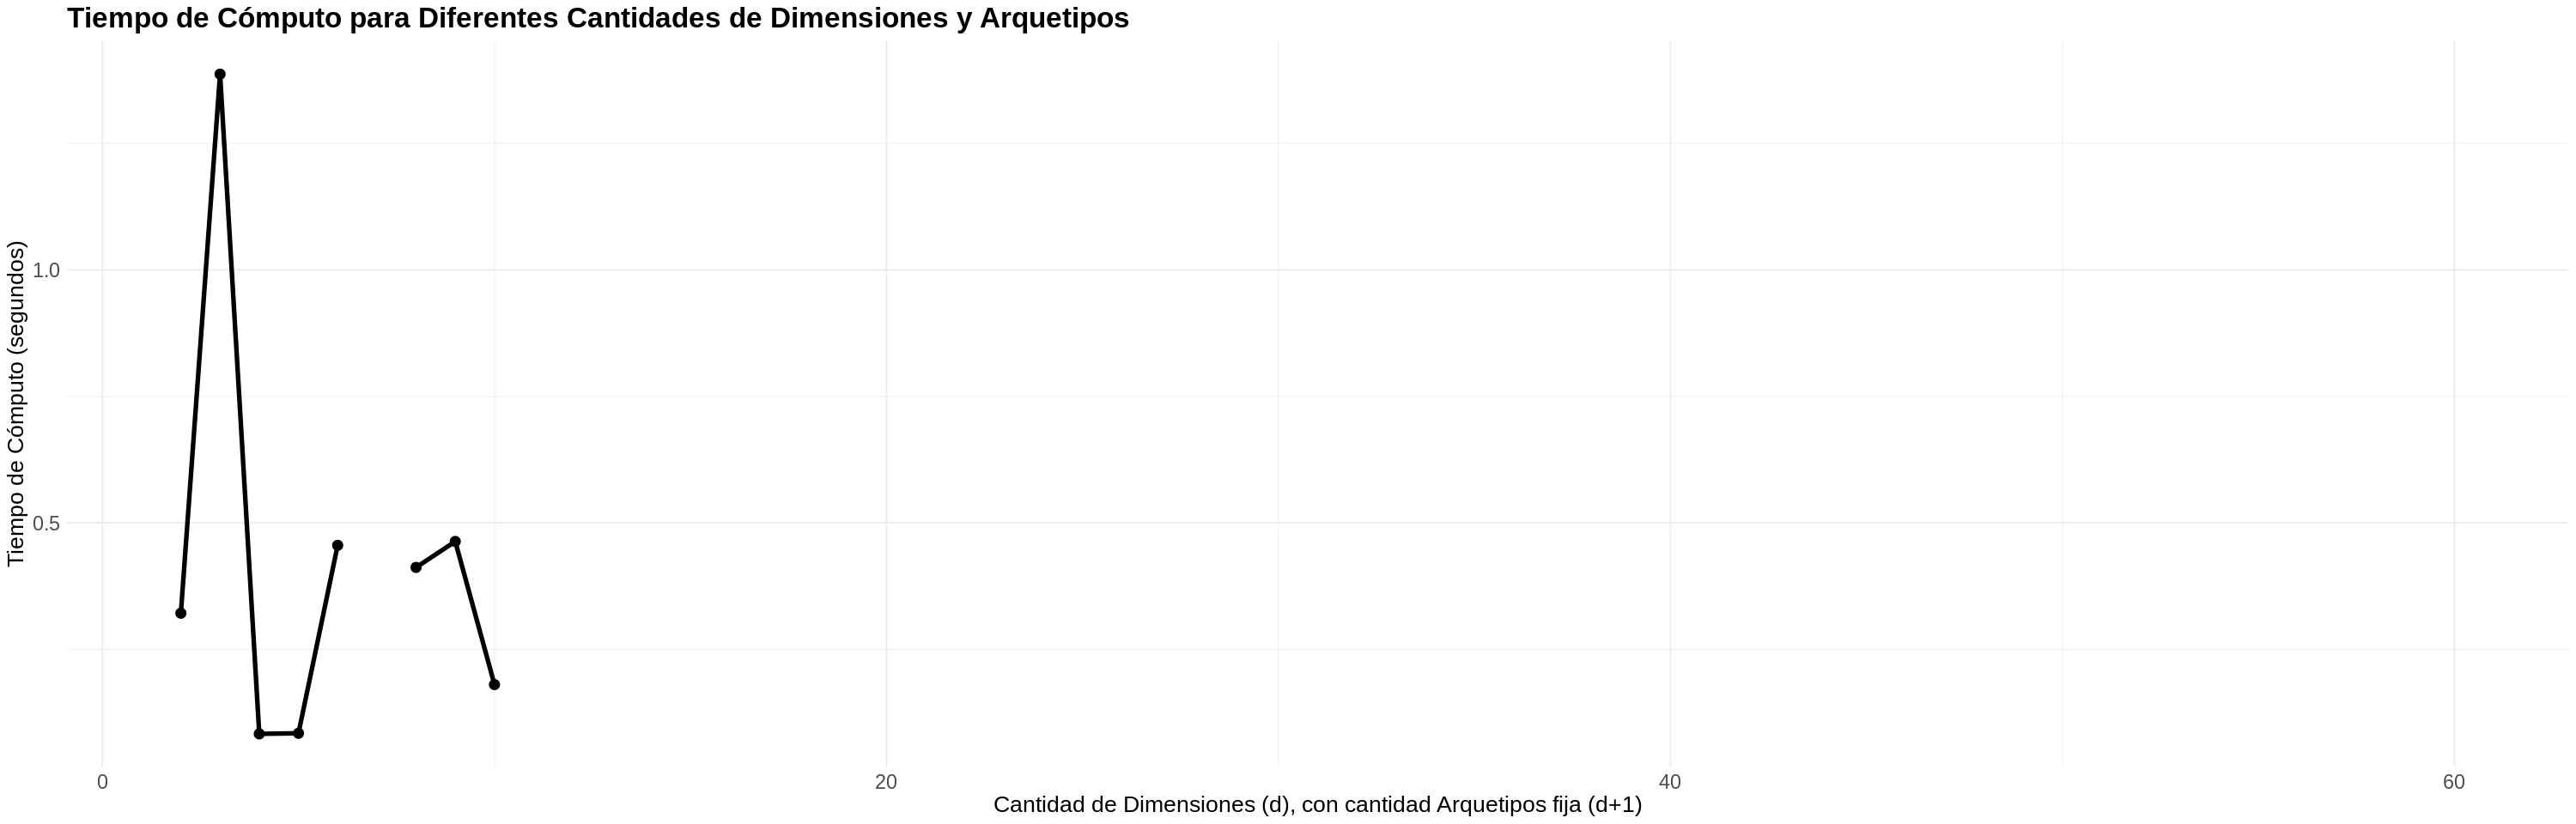

In [ ]:
# Graficamos los resultados
options(warn = -1) # Silenciamos además los warnings
options(repr.plot.width = 25, repr.plot.height = 8)

ggplot(results, aes(x = Dimensions, y = Time)) +
  geom_line(size = 1.5) +  # Increase line thickness
  geom_point(size = 3) +   # Increase point size
  labs(title = "Tiempo de Cómputo para Diferentes Cantidades de Dimensiones y Arquetipos",
       x = "Cantidad de Dimensiones (d), con cantidad Arquetipos fija (d+1)",
       y = "Tiempo de Cómputo (segundos)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14)
  )

Esto no es muy estable. Por lo cual probamos hacer el ejercicio con una selección de **3 arquetipos por default**.

In [ ]:
# Inicializamos el loop
tic()
set.seed(seed)
results <- data.frame()

# Combinamos la cantidad de dimensiones y arquetipos
for (dims in dimensions_list) {
  df <- generate_data_bis_2(sample_size, dims)
  archetypes <- 3  # Esto lo sacamos de haber observado ambos gráficos arriba por separado
  cat("// Dimensión: ", dims, " - ", "Cantidad de Arquetipos: ", archetypes, "Errores: ")
  time_taken <- measure_time(df, archetypes, seed)
  results <- rbind(results, data.frame(Dimensions = dims, Archetypes = archetypes, Time = time_taken))
}
# Tarda ~18 segundos.
toc()

// Dimensión:  2  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  3  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  4  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  5  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  6  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  7  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  8  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  9  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  10  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  20  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  40  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  50  -  Cantidad de Arquetipos:  3 Errores: // Dimensión:  60  -  Cantidad de Arquetipos:  3 Errores: 18.839 sec elapsed


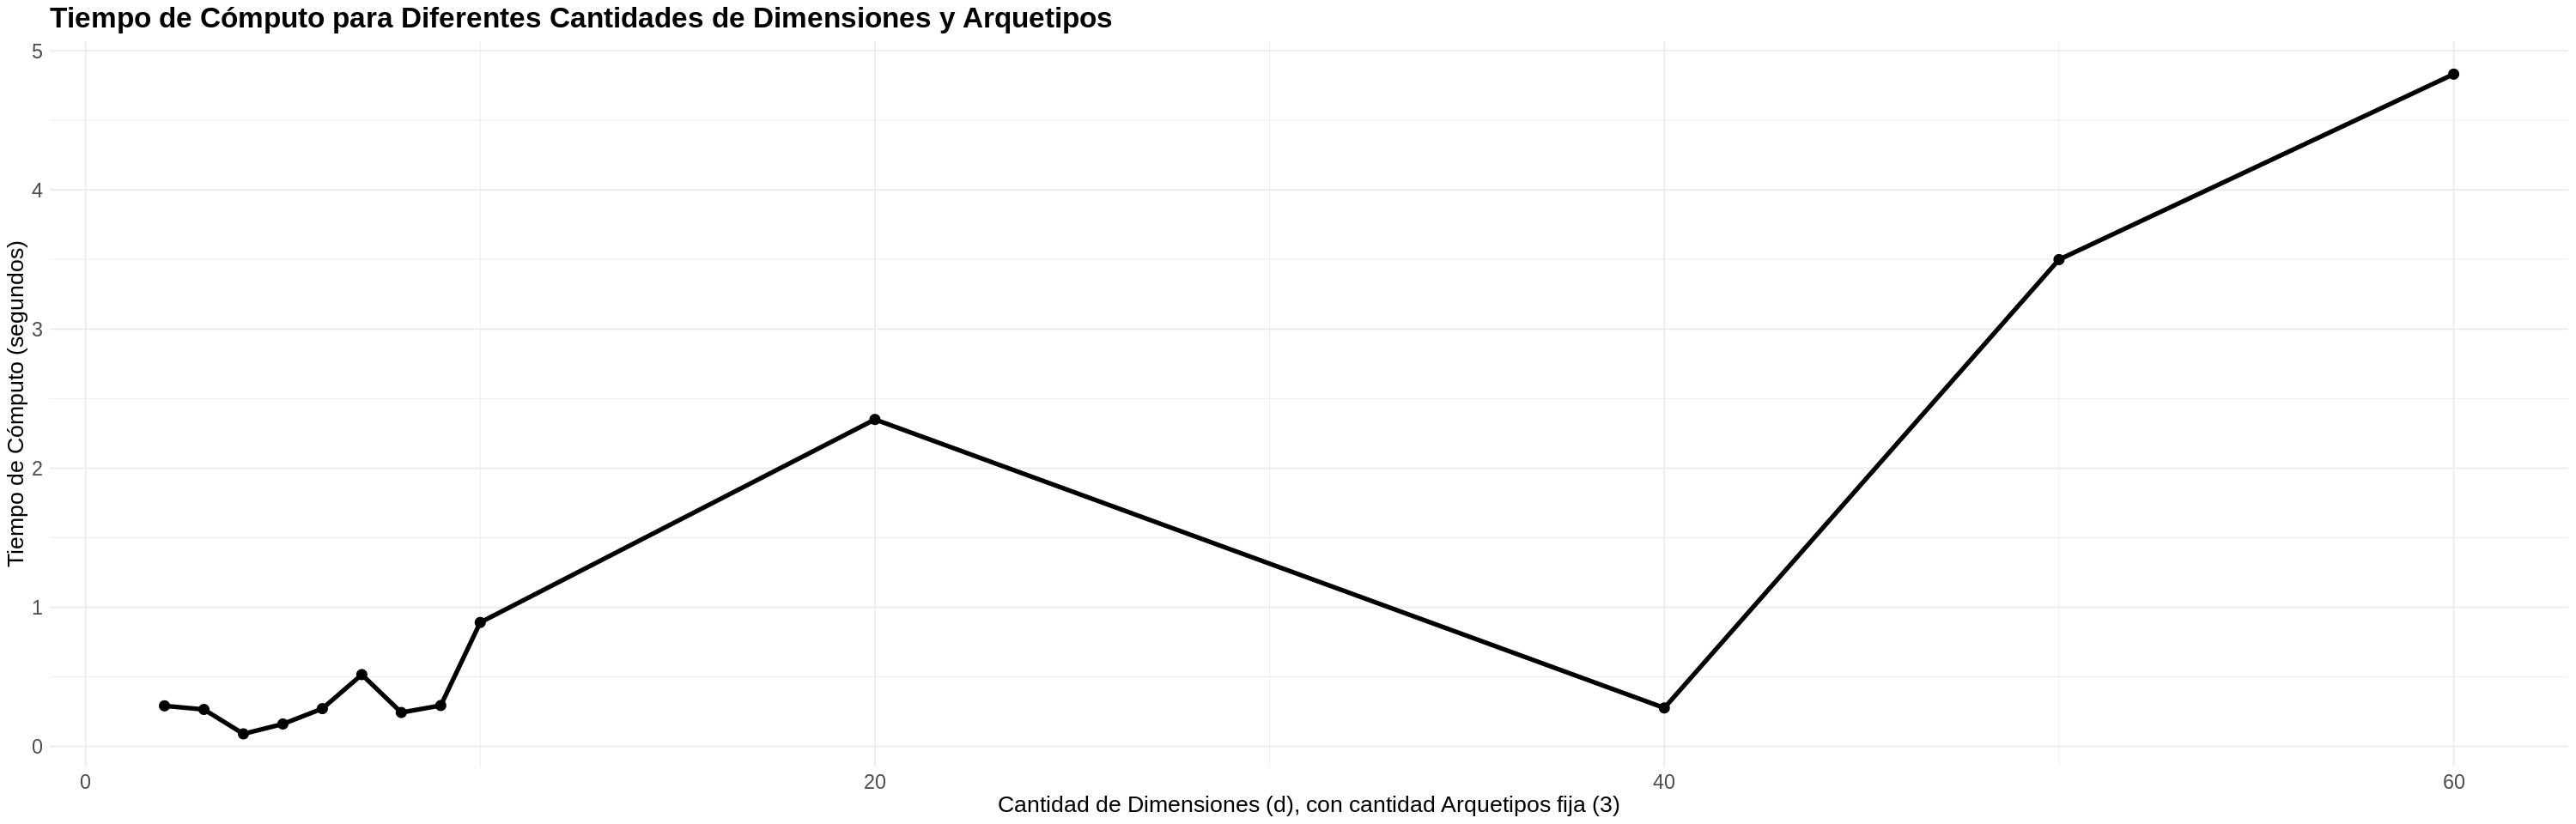

In [ ]:
# Graficamos los resultados
options(warn = -1) # Silenciamos además los warnings
options(repr.plot.width = 25, repr.plot.height = 8)

ggplot(results, aes(x = Dimensions, y = Time)) +
  geom_line(size = 1.5) +  # Increase line thickness
  geom_point(size = 3) +   # Increase point size
  labs(title = "Tiempo de Cómputo para Diferentes Cantidades de Dimensiones y Arquetipos",
       x = "Cantidad de Dimensiones (d), con cantidad Arquetipos fija (3)",
       y = "Tiempo de Cómputo (segundos)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14)
  )

# Probamos una nueva estrategia.
Arrancamos con 4 arquetipos.

Si funciona, continuamos con el procedimiento.

Si no funciona, volvemos a intentar con otra semilla. Y así sucesivamente n-veces. Si en ninguna de ellas se hallan los arquetipos solicitados, se vuelve a iniciar el procedimiento de la búsqueda de arquetipos con 4 - 1 arquetipos. Se repite todo lo previo, y de no hallarse resultados, se vuelve a inicializar la búsqueda de arquetipos con 4 - 2 arquetipos. Y así, hasta que se llegue a un arquetipo.

In [ ]:
measure_time_propuesta <- function(df, num_archetypes, initial_seed, max_retries = 5) {
  final_time <- NA
  all_seeds <- list()  # To store seeds used for each attempt
  num_archetypes_orig <- num_archetypes

  while (num_archetypes > 0) {
    seeds_used <- c()
    time_result <- NA
    retries <- 0

    while (retries < max_retries) {
      set.seed(initial_seed + retries)
      seeds_used <- c(seeds_used, initial_seed + retries)  # Store the seed

      time_result <- tryCatch({
        times <- microbenchmark(
          {
            archetypes(data = df, k = num_archetypes, verbose = FALSE, family = archetypesFamily("original", zalphasfn = archetypes:::ginv.zalphasfn))
          },
          times = 1
        )
        median(times$time) / 1e9
      }, warning = function(w) {
        if (grepl("alphas > maxKappa", w$message)) {
          message("Warning encountered (alphas > maxKappa) with seed ", initial_seed + retries, ": ", w$message)
          return(NA)
        } else {
          message("Other warning encountered: ", w$message)
          return(NA)
        }
      }, error = function(e) {
        message("Error encountered: ", e$message)
        return(NA)
      })

      if (!is.na(time_result)) {
        break  # Break the retry loop if a result is achieved
      }
      retries <- retries + 1
    }

    all_seeds[[as.character(num_archetypes)]] <- seeds_used  # Store the seeds used for this num_archetypes

    if (!is.na(time_result)) {
      final_time <- time_result
      break  # Break the num_archetypes loop if a result is achieved
    }

    num_archetypes <- num_archetypes - 1  # Reduce the number of archetypes and try again
  }

  return(list(time = final_time, seeds = all_seeds, archetypes = num_archetypes, num_archetypes_deseados = num_archetypes_orig))
}


In [ ]:
paste0("Recordamos tamaños: ")
paste0(sample_sizes)
paste0("Recordamos arquetipos: ")
paste0(archetypes_list)

[1] "Recordamos tamaños: "

[1] "300"   "500"   "1000"  "5000"  "10000"

[1] "Recordamos arquetipos: "

[1] "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "15" "20"

In [ ]:
# Ponemos algo más chico para ver que funcione
sample_sizes <- c(300,500)
archetypes_list <- c(2, 3, 4, 5, 10)
seed <- 123

In [ ]:
# Inicializamos el loop
tic()
results <- data.frame()

# Combinamos la muestra con la cantidad de arquetipos
for (n in sample_sizes) {
  df <- generate_data(n)
  for (arc in archetypes_list) {
    cat("// Muestra: ", n, " - ", "Cantidad de Arquetipos: ", arc, "Errores: ")
    time_taken <- measure_time_propuesta(df, arc, seed, max_retries = 10)

    results <- rbind(results, data.frame(sample_size = n, arc_obtenidos = time_taken$archetypes, arc_deseados = time_taken$num_archetypes_deseados, tiempo = time_taken$time))
  }
}
toc()

// Muestra:  300  -  Cantidad de Arquetipos:  2 Errores: // Muestra:  300  -  Cantidad de Arquetipos:  3 Errores: // Muestra:  300  -  Cantidad de Arquetipos:  4 Errores: // Muestra:  300  -  Cantidad de Arquetipos:  5 Errores: 

Warning encountered (alphas > maxKappa) with seed 123: k=5: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 124: k=5: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 125: k=5: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 126: k=5: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 127: k=5: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 128: k=5: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 129: k=5: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 130: k=5: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 131: k=5: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 132: k=5: alphas > maxKappa



// Muestra:  300  -  Cantidad de Arquetipos:  10 Errores: 

Other warning encountered: k=10: alphas, betas > maxKappa

Warning encountered (alphas > maxKappa) with seed 124: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 125: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 126: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 127: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 128: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 129: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 130: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 131: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 132: k=10: alphas > maxKappa

Other warning encountered: k=9: alphas, betas > maxKappa

Warning encountered (alphas > maxKappa) with seed 124: k=9: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 125: k=9: alphas > maxKappa

Warni

// Muestra:  500  -  Cantidad de Arquetipos:  2 Errores: // Muestra:  500  -  Cantidad de Arquetipos:  3 Errores: // Muestra:  500  -  Cantidad de Arquetipos:  4 Errores: 

Warning encountered (alphas > maxKappa) with seed 123: k=4: alphas > maxKappa



// Muestra:  500  -  Cantidad de Arquetipos:  5 Errores: 

Warning encountered (alphas > maxKappa) with seed 123: k=5: alphas > maxKappa



// Muestra:  500  -  Cantidad de Arquetipos:  10 Errores: 

Warning encountered (alphas > maxKappa) with seed 123: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 124: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 125: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 126: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 127: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 128: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 129: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 130: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 131: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 132: k=10: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 123: k=9: alphas > maxKappa

Warning encountered (alphas > maxKappa) with seed 124: k=9: alphas > maxKappa

Warning encountered (alphas > maxKappa) wi

83.248 sec elapsed


In [ ]:
results

sample_size,arc_obtenidos,arc_deseados,tiempo
<dbl>,<dbl>,<dbl>,<dbl>
300,2,2,0.90371547
300,3,3,0.26484750
300,4,4,0.26575722
300,4,5,0.27462035
300,4,10,0.25809242
500,2,2,0.06125403
500,3,3,0.33262642
500,4,4,0.45738698
500,5,5,1.22715013


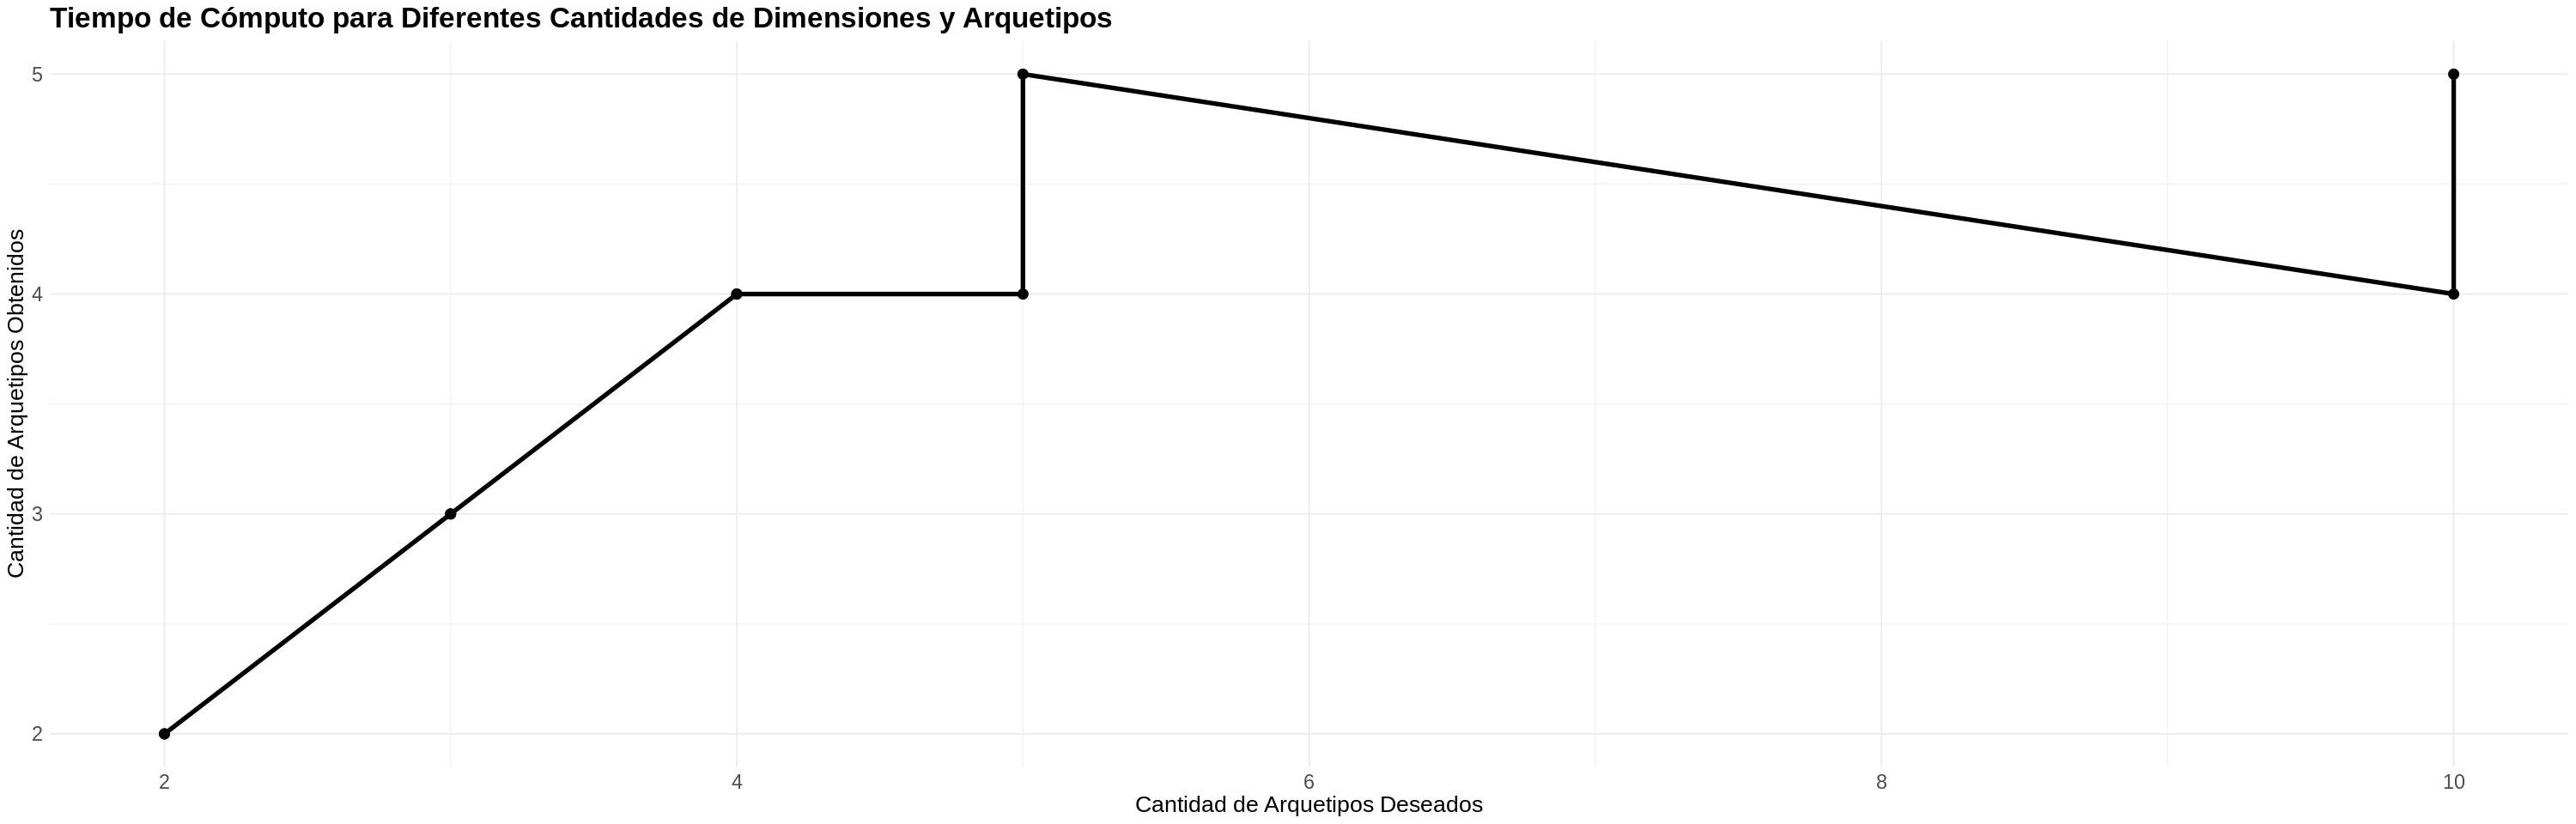

In [ ]:
# Graficamos los resultados
options(warn = -1) # Silenciamos además los warnings
options(repr.plot.width = 25, repr.plot.height = 8)

ggplot(results, aes(x = arc_deseados, y = arc_obtenidos)) +
  geom_line(size = 1.5) +  # Increase line thickness
  geom_point(size = 3) +   # Increase point size
  labs(title = "Arquetipos Deseados vs Obtenidos",
       x = "Cantidad de Arquetipos Deseados",
       y = "Cantidad de Arquetipos Obtenidos") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14)
  )

# **cluster_alloc()**
Lo que vamos a hacer ahora es hacer una comparativa entre la estrategia de clustering actual y la propuesta con arquetipos, comparando sus tiempos de cómputos y errores de clasificación para algún dataset simulado.

Definimos las funciones que utilizamos en ambos casos.

**Esta es la función que ya teníamos genérica.**

In [ ]:
# ###########################
# ### cluster_alloc_fer() ###
# ###########################

# # library(cluster)
# # library(geometry)

# # Definimos las distancias. Calculamos la distancia a cada punto y asignamos la mínima
# distancia_euclidea_fer <- function(point, hull) {
#     hull_distances = apply(hull, 1, function(hull_point) {
#         sqrt(sum((point - hull_point)^2))
#     })
#     return(min(hull_distances))
# }

# distancia_mahalanobis_fer <- function(point, hull_points, cov_matrix) {    # Le cambiamos el nombre porque si no nos rompe de arriba
#     cluster_distances = apply(hull_points, 1, function(hull_point) {
#         diff = point - hull_point
#         sqrt(t(diff) %*% solve(cov_matrix) %*% diff)
#     })
#     return(min(cluster_distances))
# }

# # Armamos la función para poder clusterizar
# cluster_alloc_fer <- function(X, ld, alpha_q = seq(0.5, 0.9, 0.1), K, distance = "euclidean", n_arch = 3, seed_arch = 9102) {
#     d <- dim(X)
#     alpha_length <- length(alpha_q)
#     cluster <- matrix(NA, nrow = d[1], ncol = alpha_length)
#     archetypes <- vector("list", length = K * alpha_length)

#     for (j in 1:alpha_length) {
#         region_index <- which(ld > quantile(ld, alpha_q[j]))
#         others_index <- which(ld <= quantile(ld, alpha_q[j]))

#         if (length(region_index) <= K + 1) {
#             next
#         }

#         # Clustering for the main region
#         region_cluster <- kmeans(X[region_index, ], centers = K)$cluster
#         cluster[region_index, j] <- region_cluster

#         # Esto es la versión original
#         # Compute archetypes for each cluster
#         for (k in 1:K) {
#             # arch <- archetypal(df = data.frame(X[which(cluster[, j] == k), ]), kappas = n_arch, verbose = FALSE, rseed = seed_arch, save_history = FALSE)
#             # archetypes[[k + (j - 1) * K]] <- arch$BY

#             # Esto es usando "archetypes"

#             archetypes[[k + (j - 1) * K]] <- parameters(arch)
#         }

#         # Assign clusters to remaining observations based on convex hull distances or to the archetypes
#         for (i in others_index) {
#             min_dist <- Inf
#             closest_cluster <- NA

#             for (k in 1:K) {
#                 # Esto es de lo que hicimos primero, de considerar una cápsula convexa
#                 # hull_indices <- convhulln(archetypes[[k + (j - 1) * K]])
#                 # hull_points <- archetypes[[k + (j - 1) * K]][hull_indices, ]

#                 # Ahora directamente consideramos
#                 archetype_point <- archetypes[[k + (j - 1) * K]]

#                 if (distance == "euclidean") {
#                     # dist_to_hull <- distancia_euclidea_fer(X[i, ], # hull_points)
#                     dist_to_archetype <- distancia_euclidea_fer(X[i, ], archetype_point)
#                 } else if (distance == "mahalanobis") {
#                   # Va a ser la distancia a los puntos de la cobertura convexa, pero estimando la covarianza con los puntos del cluster !!!
#                     cluster_points <- X[region_index[region_cluster == k], ]
#                     cov_matrix <- var(cluster_points)

#                     # dist_to_hull <- distancia_mahalanobis_fer(X[i, ], hull_points, cov_matrix)
#                     dist_to_archetype <- distancia_mahalanobis_fer(X[i, ], archetype_point, cov_matrix)
#                 } else {
#                     stop("Invalid distance parameter")
#                 }

#                 # if (!is.na(dist_to_hull) && dist_to_hull < min_dist) {
#                 if (!is.na(dist_to_archetype) && dist_to_archetype < min_dist) {
#                     min_dist <- dist_to_archetype
#                     closest_cluster <- k
#                 }
#             }

#             cluster[i, j] <- closest_cluster
#         }
#     }

#     return(list(cluster = cluster, archetypes = archetypes))
#  }

**Esta es la función que proponemos con la estrategia del cambio de semilla y la reducción de arquetipos.**

In [ ]:
# library(cluster)
# library(geometry)

# Definimos las distancias. Calculamos la distancia a cada punto y asignamos la mínima
distancia_euclidea_fer <- function(point, hull) {
    hull_distances = apply(hull, 1, function(hull_point) {
        sqrt(sum((point - hull_point)^2))
    })
    return(min(hull_distances))
}

distancia_mahalanobis_fer <- function(point, hull_points, cov_matrix) {    # Le cambiamos el nombre porque si no nos rompe de arriba
    cluster_distances = apply(hull_points, 1, function(hull_point) {
        diff = point - hull_point
        sqrt(t(diff) %*% solve(cov_matrix) %*% diff)
    })
    return(min(cluster_distances))
}

cluster_alloc_fer <- function(X, ld, alpha_q = seq(0.5, 0.9, 0.1), K, distance = "euclidean", n_arch = 3, seed_arch = 9102, max_iter = 10) {
    d <- dim(X)
    alpha_length <- length(alpha_q)
    cluster <- matrix(NA, nrow = d[1], ncol = alpha_length)
    archetypes <- vector("list", length = K * alpha_length)

    retry_archetypes <- function(df, n_arch, seed_arch, max_iter) {
        for (i in 1:max_iter) {
            set.seed(seed_arch + i)
            tryCatch({
                arch <- archetypes(data = df, k = n_arch, verbose = FALSE)
                return(parameters(arch))  # Return the archetypes if successful
            }, warning = function(w) {
                if (grepl("alphas > maxKappa", w$message)) {
                    return(NULL)
                } else {
                    return(NULL)
                }
            }, error = function(e) {
                return(NULL)
            })
        }
        return(NULL)  # Return NULL if no successful result after max_iter
    }

    for (j in 1:alpha_length) {
        region_index <- which(ld > quantile(ld, alpha_q[j]))
        others_index <- which(ld <= quantile(ld, alpha_q[j]))

        if (length(region_index) <= K + 1) {
            next
        }

        # Clustering for the main region
        region_cluster <- kmeans(X[region_index, ], centers = K)$cluster
        cluster[region_index, j] <- region_cluster

        # Compute archetypes for each cluster
        for (k in 1:K) {
            df_cluster <- data.frame(X[which(cluster[, j] == k), ])
            arch <- retry_archetypes(df_cluster, n_arch, seed_arch, max_iter)

            if (is.null(arch)) {
                message("Failed to compute archetypes for cluster ", k, " at alpha_q[", j, "] with n_arch = ", n_arch)
                # Try with one less archetype
                arch <- retry_archetypes(df_cluster, n_arch - 1, seed_arch, max_iter)

                if (is.null(arch)) {
                    stop("Failed to compute archetypes with reduced number as well.")
                }
            }
            archetypes[[k + (j - 1) * K]] <- arch
        }

        # Assign clusters to remaining observations based on convex hull distances or archetypes
        for (i in others_index) {
            min_dist <- Inf
            closest_cluster <- NA

            for (k in 1:K) {
                archetype_point <- archetypes[[k + (j - 1) * K]]

                if (distance == "euclidean") {
                    dist_to_archetype <- distancia_euclidea_fer(X[i, ], archetype_point)
                } else if (distance == "mahalanobis") {
                    cluster_points <- X[region_index[region_cluster == k], ]
                    cov_matrix <- var(cluster_points)
                    dist_to_archetype <- distancia_mahalanobis_fer(X[i, ], archetype_point, cov_matrix)
                } else {
                    stop("Invalid distance parameter")
                }

                if (!is.na(dist_to_archetype) && dist_to_archetype < min_dist) {
                    min_dist <- dist_to_archetype
                    closest_cluster <- k
                }
            }

            cluster[i, j] <- closest_cluster
        }
    }

    return(list(cluster = cluster, archetypes = archetypes))
}


In [ ]:
##########################################
### cluster_alloc() de Lucas y Marcela ###
##########################################

# Estas son las funciones de distancia que establecieron Lucas y Marcela

#### MAHALANOBIS DIST
mahalanobis_dist = function(x, data, sigma=var(data)) {
  if (any(class(data)=="numeric")) {
    #print("Sigma can't be approximated if nrow(data)=1")
    return(NA)
  }
  else {
    n = nrow(as.matrix(data))
    cond_number = rcond(sigma)
    if (cond_number < 0.01) {
      #message = paste0(
      #                paste("Condition number is:", cond_number),
      #                paste(". Matrix is ill-conditioned, return NA")
      #                )
      #print(message)
      return(NA)
    } else {
      sigma_inv = solve(sigma)
      md = numeric(n)
      for (i in 1:n) md[i] = (x-data[i,])%*%sigma_inv%*%as.matrix(x-data[i,])
      return(md)
    }
  }
}

#### EUCLIDEAN DIST
euclidean_dist = function(x, data) {
  if (any(class(data)=="numeric")) data = matrix(data, nrow=1, ncol=length(data))
  n = nrow(data)
  ed = numeric(n)
  for (i in 1:n) ed[i] = (x-data[i,])%*%as.matrix(x-data[i,])
  return(ed)
}

# La función propiamente dicha

#################################
#### CLUSTER ALLOCATION VER2 ####
#################################

# source("distances.R") # Esto lo tenemos definido acá arriba

cluster_alloc = function(X, ld, alpha_q=seq(0.5,0.9,0.1), K, distance="euclidean") {
  #INPUT
  #X: data that will be assigned local depth. Matrix each row is an observation.
  #ld: local depth calculated for the data.
  #alpha_q: a grid of values between 0.5 and 0.9 to select the percentage of deepest points for
  #                the core region. For example, alpha_quantile = 0.9 implies that the core region
  #                contains the ten percent of deepest points.
  #K: number of clusters.
  #distance: euclidean or mahalanobis.
  #verbose: if TRUE prints the progress
  #OUTPUT
  #clusters: clusters allocation.

  d = dim(X)
  alpha_length = length(alpha_q)
  cluster = matrix(NA, nrow=d[1], ncol=alpha_length)

  for (j in 1:alpha_length) {
    # Step 1: core
    region_index = which(ld>quantile(ld,alpha_q[j]))
    others_index = which(ld<=quantile(ld,alpha_q[j]))
    if (length(region_index)<=K+1) {
      #print("Warning: the number of core points is less than the number of clusters")
      next
    }
    region_cluster = kmeans(X[region_index,], centers=K)$cluster
    cluster[region_index,j] = region_cluster

    # Aquí habría que calcular los arquetipos

    # Step 2: distance. # Esta distancia sería luego al arquetipo
    if (distance=="euclidean") {
      for (i in others_index) {
        dis = numeric(K)
        for (k in 1:K) dis[k] = min(euclidean_dist(x=X[i,], data=X[region_index[region_cluster==k],]))
        cluster[i,j] = which.min(dis)
      }
    }
    else if(distance=="mahalanobis") {
      for (i in others_index) {
        dis = numeric(K)
        for (k in 1:K) {
          md = mahalanobis_dist(x=X[i,], data=X[region_index[region_cluster==k],])
          if (any(is.na(md))) {
            cluster[i,j] = NA
          } else {
          dis[k] = min(md)
          cluster[i,j] = which.min(dis)
          }
        }
      }
    }
    else {
      print("Distance parameter invalid")
    }
  }
  return(cluster)
}

Tenemos en particular tres ejemplos:
- **Ejemplo 5**: Tibshirani retomado por salibian con contaminacion en la variable informativa, esférico, sin ruido.
- **Ejemplo 8**: Tibshirani retomado por salibian con contaminacion en la variable informativa, elipsoidal, con ruido sin Paindavaine.
- **Ejemplo 10**: Tibshirani retomado por Salibian con contaminacion en la variable noinformativa, elipsoidal, sin ruido.

Tomamos el caso 5, porque es el que veníamos trabajando. Pero da lo mismo cualquiera de ellos.

In [ ]:
# Ejemplo 5
# Ejemplo tibshirani retomado por salibian con contaminacion en la variable informativa,
# esférico, sin ruido

n = 300 # tamaño muestral
p = 3 # nro de variables no informativas
mu = 3
k = 3
sig = diag(rep(1,p),p)
NN = 500

classgood=c(rep(1,n/3),rep(2,n/3),rep(3,n/3))

set.seed(1234)
X1 = rmvnorm(n/3,c((-1)*mu,(-1)*mu,rep(0,p-2)),sigma=sig)
X2 = rmvnorm(n/3,rep(0,p),sigma=sig)
X3 = rmvnorm(n/3,c(mu,mu,rep(0,p-2)),sigma=sig)

X = rbind(X1,X2,X3)
X[1:5,1]=rep(25,5)+runif(5)*0.01 ######agrego outliers en la variable informativa

In [ ]:
# # Ejemplo 8
# # Ejemplo Tibshirani retomado por salibian
# # con contaminacion en la variable informativa, elipsoidal, con ruido
# # sin Paindavaine

# n = 300
# p=5
# mu=3
# k=3
# sig=diag(c(4,1/3,rep(1,p-2)),p)
# NN=500

# classgood=c(rep(1,n/3),rep(2,n/3),rep(3,n/3))

# set.seed(1234)
# X1 = rmvnorm(n/3,c((-1)*mu,(-1)*mu,rep(0,p-2)),sigma=sig)
# X2 = rmvnorm(n/3,rep(0,p),sigma=sig)
# X3 = rmvnorm(n/3,c(mu,mu,rep(0,p-2)),sigma=sig)

# X = rbind(X1,X2,X3)
# X[1:5,1]=25+runif(5)*0.01

In [ ]:
# # Ejemplo 10

# # Ejemplo Tibshirani retomado por Salibian con
# # contaminacion en la variable noinformativa, elipsoidal, sin ruido

# n = 300
# p=3
# mu=3
# k=3
# sig=diag(c(4,1/3,rep(1,p-2)),p)
# NN=500

# classgood=c(rep(1,n/3),rep(2,n/3),rep(3,n/3))

# set.seed(1234)
# X1 = rmvnorm(n/3,c((-1)*mu,(-1)*mu,rep(0,p-2)),sigma=sig)
# X2 = rmvnorm(n/3,rep(0,p),sigma=sig)
# X3 = rmvnorm(n/3,c(mu,mu,rep(0,p-2)),sigma=sig)

# X = rbind(X1,X2,X3)
# X[1:5,p]=25+runif(5)*0.01
# #plot(X,col=c(rep(1,100),rep(2,100),rep(3,100)))

Hacemos la comparativa de errores de cómputo y clasificación.

In [ ]:
# Fijamos parámetros y profundidades iniciales, que no las vamos a cambiar
# Esto va a ser insumo de ambos criterios de clasificación

tic()
beta = 0.3
m = 500
alpha_q = c(0.5)
K = 3
distance = "euclidean"

ld_lucmar = idld_m(X,X,beta,m,verbose=FALSE)
toc()

3.075 sec elapsed


Algoritmo original de Lucas y Marcela:

In [ ]:
tic()
cluster_original_lucmar = cluster_alloc(X = X, ld = ld_lucmar, alpha_q = alpha_q, K = K, distance = distance)
toc()

0.263 sec elapsed


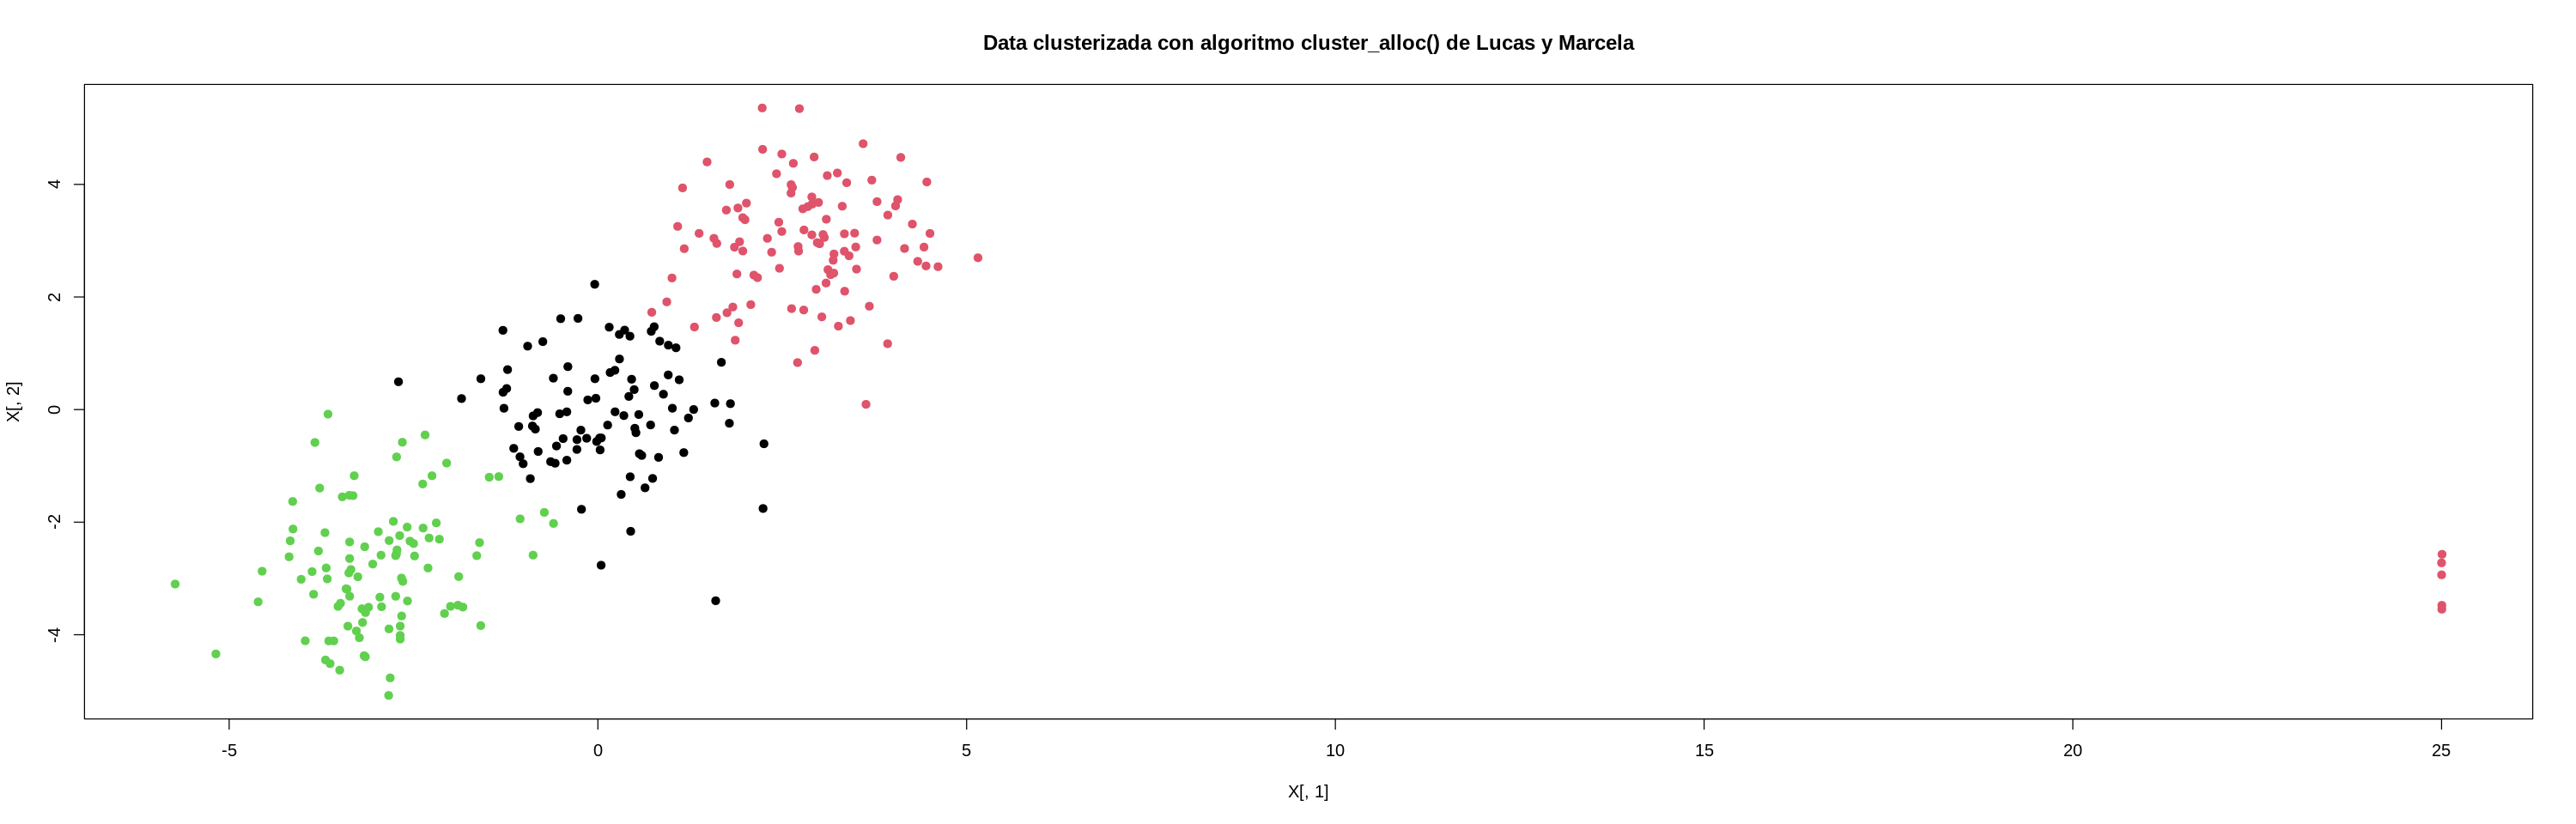

In [ ]:
plot(X[, 1], X[, 2], col = cluster_original_lucmar[,1], pch=19, main = "Data clusterizada con algoritmo cluster_alloc() de Lucas y Marcela")
colors = rainbow(K)

Vemos las métricas de acierto:

In [ ]:
# Asignaciones de clúster para el primer alpha_q
pred_clusters_lucmar = cluster_original_lucmar[, 1]

In [ ]:
# Matriz de confusión
conf_matrix_lucmar = table(classgood, pred_clusters_lucmar)

In [ ]:
conf_matrix_lucmar

         pred_clusters_lucmar
classgood   1   2   3
        1   1   5  94
        2  91   4   5
        3   0 100   0

In [ ]:
(94+91+100)/sum(conf_matrix_lucmar)

[1] 0.95

Esto se hace dificil de automatizar, puesto que tenemos que probar qué algoritmo funciona bien para reasignar las etiquetas. El algoritmo húngaro, por ejemplo, no funciona bien, porque en vez de darme el 95% de arriba me da 3%.

In [ ]:
# Crear una matriz de confusión
cm <- table(classgood, pred_clusters_lucmar)

# Usar el algoritmo húngaro para encontrar la mejor correspondencia de clusters
assignment <- solve_LSAP(cm, maximum = TRUE)

# Asignar los clusters según la correspondencia encontrada
aligned_cluster_labels <- sapply(pred_clusters_lucmar, function(x) assignment[x])

# Calcular el CCR
ccr <- sum(aligned_cluster_labels == classgood) / length(classgood)
print(paste("Correct Classification Rate (CCR):", ccr))

[1] "Correct Classification Rate (CCR): 0.0333333333333333"


In [ ]:
# Limpiamos esto que entonces no vamos a usar
rm(cm, assignment, aligned_cluster_labels, ccr)

Hacemos entonces el Rand Index (RI) y el Adjusted Rand Index (ARI).

In [ ]:
# Calcular el índice de Rand (RI)
ri <- rand.index(classgood, pred_clusters_lucmar)
print(paste("Rand Index (RI):", ri))

[1] "Rand Index (RI): 0.935585284280936"


In [ ]:
# Calcular el índice Rand ajustado (ARI)
ari <- adjustedRandIndex(classgood, pred_clusters_lucmar)
print(paste("Adjusted Rand Index (ARI):", ari))

[1] "Adjusted Rand Index (ARI): 0.854757554301706"


Algoritmo de Fer:

In [ ]:
# Esto fue con el método regular, sin reemplazar ni semillas ni cantidades de arquetipos

# tic()
# cluster_original_fer = cluster_alloc_fer(X = X, ld = ld_lucmar, alpha_q = alpha_q, K = K, distance = distance, n_arch = 4, seed_arch = 9102)
# # Esto antes, con la versión 1, tardaba ~36.181 segundos
# # Ahora tarda ~0.194 segundos
# toc()

0.194 sec elapsed


In [ ]:
tic()
cluster_original_fer = cluster_alloc_fer(X = X, ld = ld_lucmar, alpha_q = alpha_q, K = K, distance = distance, n_arch = 4, seed_arch = 9102)
# Esto antes, con la versión 1, tardaba ~36.181 segundos
# Ahora tarda ~0.194 segundos
toc()

0.596 sec elapsed


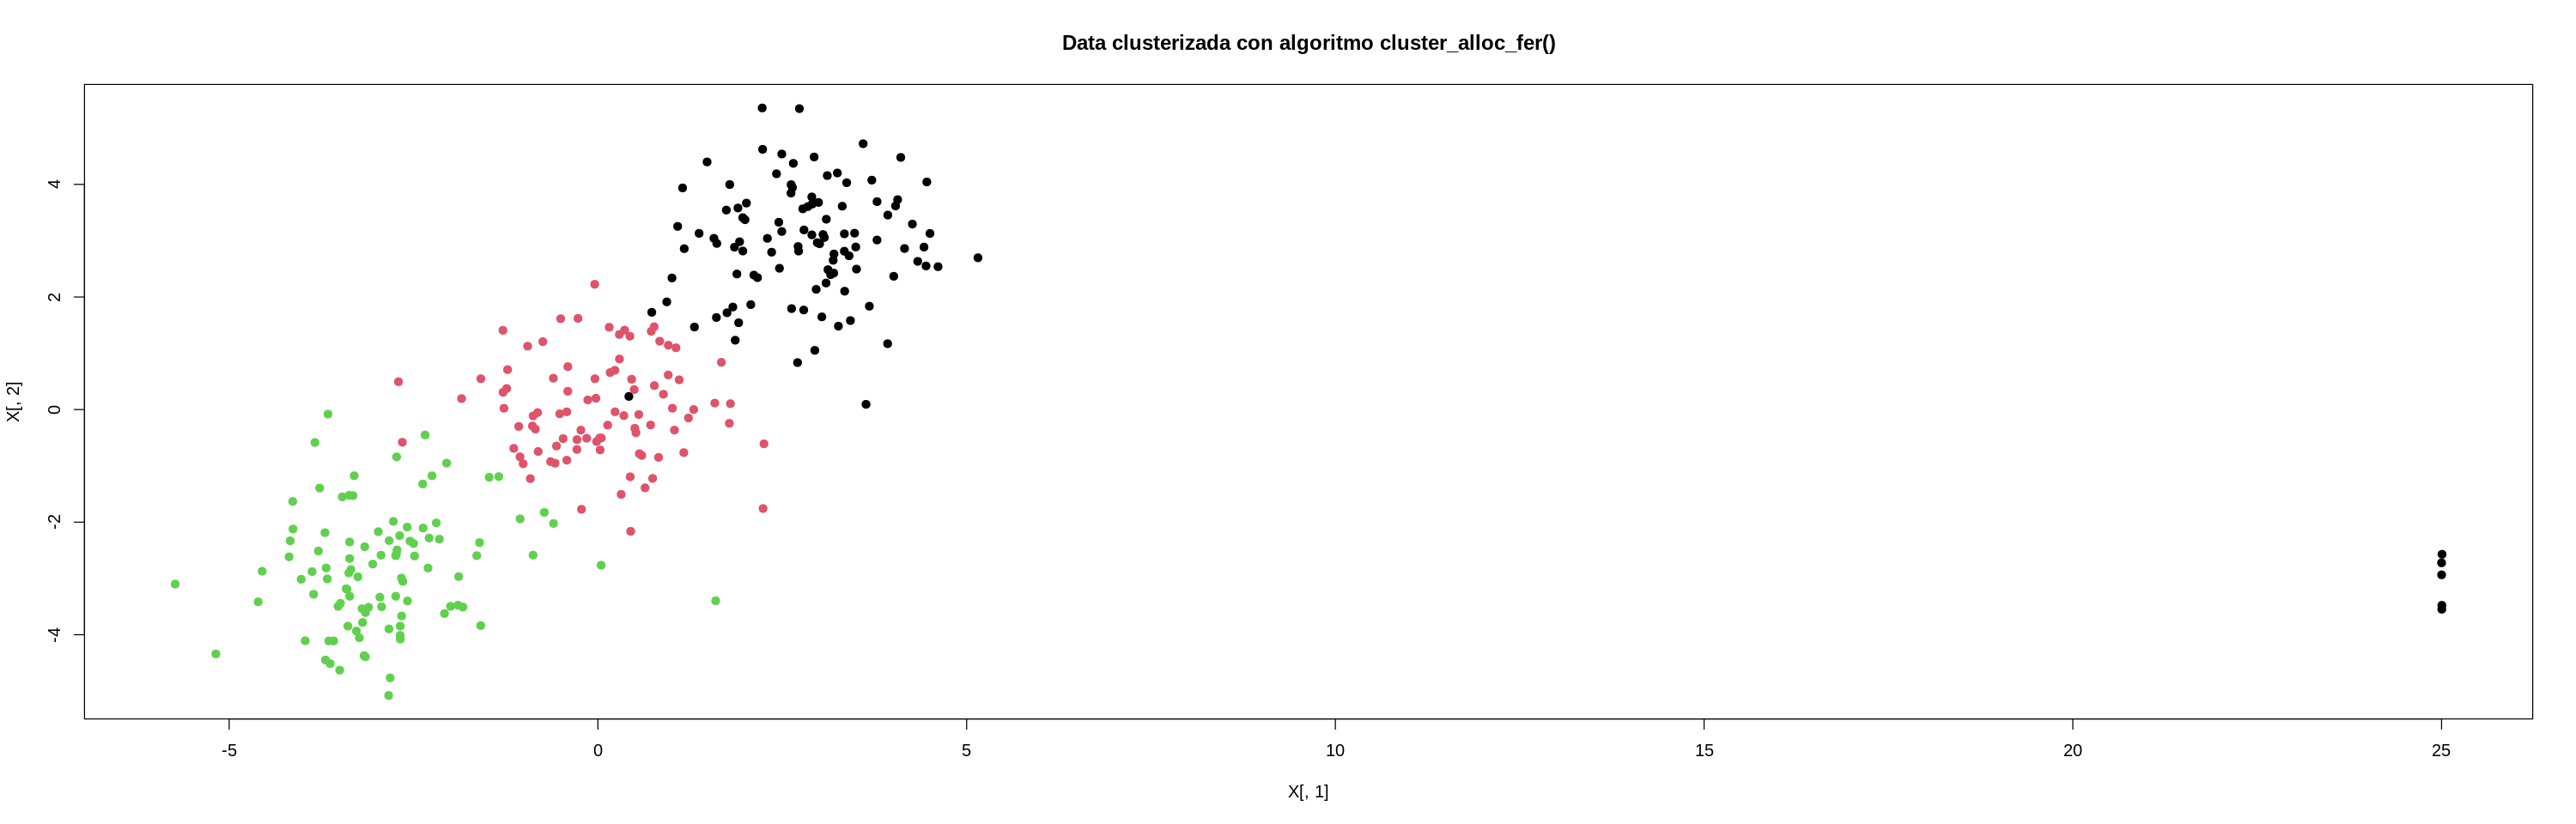

In [ ]:
plot(X[, 1], X[, 2], col = cluster_original_fer$cluster[,1], pch = 19, main = "Data clusterizada con algoritmo cluster_alloc_fer()")
colors = rainbow(K)

Vemos entonces el RI y el ARI.

In [ ]:
# Calcular el índice de Rand (RI)
ri <- rand.index(classgood, cluster_original_fer$cluster)
print(paste("Rand Index (RI):", ri))

[1] "Rand Index (RI): 0.935340022296544"


In [ ]:
# Calcular el índice Rand ajustado (ARI)
ari <- adjustedRandIndex(classgood, cluster_original_fer$cluster)
print(paste("Adjusted Rand Index (ARI):", ari))

[1] "Adjusted Rand Index (ARI): 0.85427135678392"


# Ahora queremos ver entonces, cómo evolucionan tanto los tiempos de ejecución como las métricas de ajuste de los clusters.

In [ ]:
# Armamos los datasets que vamos a querer comparar
# Hacemos el ejercicio con la estructura de muestra del ejemplo 5

# Función para generar el conjunto de datos
generate_data_ejemplo_5 <- function(n, p, mu, sig) {
  X1 <- rmvnorm(n/3, c((-1) * mu, (-1) * mu, rep(0, p - 2)), sigma = sig)
  X2 <- rmvnorm(n/3, rep(0, p), sigma = sig)
  X3 <- rmvnorm(n/3, c(mu, mu, rep(0, p - 2)), sigma = sig)

  X <- rbind(X1, X2, X3)
  X[1:5, 1] <- rep(25, 5) + runif(5) * 0.01 # Agregar outliers en la variable informativa

  # Crear las etiquetas de clase
  classgood <- c(rep(1, n/3), rep(2, n/3), rep(3, n/3))

  # Devolver los datos y las etiquetas como una lista
  return(list(data = X, class_labels = classgood))
}

# Parámetros
p <- 3
mu <- 3
sig <- diag(rep(1, p), p)
semilla <- 1234

# Vamos a hacer estas muestras
# sample_sizes <- c(300, 900, 1200, 3000, 6000, 9000, 15000, 18000) # Esto explota, + 6hs y no termina
sample_sizes <- c(300, 900, 3000, 9000, 18000) # Esto me mata la ejecución en local, y no me permite que me asignen un equipo en el Colab
# sample_sizes <- c(300, 900, 3000, 6000, 10000)

# Crear la lista de conjuntos de datos
datasets <- lapply(sample_sizes, function(n) {
  set.seed(semilla) # Para reproducibilidad
  generate_data_ejemplo_5(n, p, mu, sig)
})

# Acceso al output:
# datasets[[1]]$data
# datasets[[1]]$class_labels

In [ ]:
tic()
# Inicialiamos un df vacío que vamos a ir llenando a medida que vaya avanzando el bucle
results <- data.frame(
  Dataset = character(),
  Method = character(),
  RI = numeric(),
  ARI = numeric(),
  ExecutionTime = numeric(),
  stringsAsFactors = FALSE
)

# Hacemos el bucle de cada base simulada
for (i in seq_along(datasets)) {
  dataset <- datasets[[i]]$data
  classgood <- datasets[[i]]$class_labels

  dataset_name <- paste("Dataset ", dim(dataset)[1]) # Le asignamos como nombre su cantidad de observaciones

  # Establecemos parámetros fijos para cada profundidad y clustering
  beta_loop = 0.3
  m_loop = 500
  alpha_q_loop = c(0.5)
  K_loop = 3
  distance = "euclidean"
  cantidad_de_arquetipos = 3
  semilla_arquetipos = 9102

  # Calculamos la profundidad
  ld_lucmar_loop = idld_m(dataset, dataset, beta_loop, m_loop, verbose = FALSE)


  # Corremos cluster_alloc_fer() para medir su tiempo y resultados
  start_time_fer <- Sys.time()
  cluster_original_fer <- cluster_alloc_fer(X = dataset, ld = ld_lucmar_loop, alpha_q = alpha_q_loop, K = K_loop, distance = distance, n_arch = cantidad_de_arquetipos, seed_arch = semilla_arquetipos)
  end_time_fer <- Sys.time()
  execution_time_fer <- as.numeric(difftime(end_time_fer, start_time_fer, units = "secs"))

  # Corremos cluster_alloc() para medir su tiempo y resultados
  start_time_lucmar <- Sys.time()
  cluster_original_lucmar <- cluster_alloc(X = dataset, ld = ld_lucmar_loop, alpha_q = alpha_q_loop, K = K_loop, distance = distance)
  end_time_lucmar <- Sys.time()
  execution_time_lucmar <- as.numeric(difftime(end_time_lucmar, start_time_lucmar, units = "secs"))

  # Computamos el RI y el ARI
  ri_fer <- rand.index(classgood, cluster_original_fer$cluster)
  ari_fer <- adjustedRandIndex(classgood, cluster_original_fer$cluster)

  ri_lucmar <- rand.index(classgood, cluster_original_lucmar[,1])
  ari_lucmar <- adjustedRandIndex(classgood, cluster_original_lucmar[,1])

  # Guardamos resultados
  results <- rbind(results, data.frame(
    Dataset = dataset_name,
    Method = "fer",
    RI = ri_fer,
    ARI = ari_fer,
    ExecutionTime = execution_time_fer
  ))

  results <- rbind(results, data.frame(
    Dataset = dataset_name,
    Method = "lucmar",
    RI = ri_lucmar,
    ARI = ari_lucmar,
    ExecutionTime = execution_time_lucmar
  ))
}

# Convertir la columna Dataset a factor con el orden deseado
results$Muestra <- factor(results$Dataset, levels = unique(results$Dataset))

# Esto tardaba > 20_000 segundos (~ 6 horas)
toc()

20645.667 sec elapsed


In [ ]:
results

Dataset,Method,RI,ARI,ExecutionTime,Muestra
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Dataset 300,fer,0.9311260,0.8448292,0.3851526,Dataset 300
Dataset 300,lucmar,0.9395987,0.8638254,0.2450681,Dataset 300
Dataset 900,fer,0.9391843,0.8631642,0.2273860,Dataset 900
Dataset 900,lucmar,0.9459177,0.8782419,1.4203198,Dataset 900
Dataset 3000,fer,0.9340465,0.8518516,2.0205281,Dataset 3000
Dataset 3000,lucmar,0.9448214,0.8759981,16.6641130,Dataset 3000
Dataset 9000,fer,0.9288728,0.8402979,2.1066270,Dataset 9000
Dataset 9000,lucmar,0.9544236,0.8975275,149.9476979,Dataset 9000
Dataset 18000,fer,0.9099782,0.7978114,12.1332085,Dataset 18000


In [ ]:
# Esto es viejo

# # Esto fue con el método original de clustering


# # Recreamos porque lo de arriba tardó mucho tiempo en correr y la instancia se cerró
# results <- data.frame(
#   Dataset = c("Dataset 300", "Dataset 300", "Dataset 900", "Dataset 900",
#               "Dataset 3000", "Dataset 3000", "Dataset 9000", "Dataset 9000",
#               "Dataset 18000", "Dataset 18000"),
#   Method = c("fer", "lucmar", "fer", "lucmar", "fer", "lucmar", "fer", "lucmar", "fer", "lucmar"),
#   RI = c(0.9079822, 0.9395987, 0.9206180, 0.9459177, 0.9150795, 0.9472533, 0.9247444, 0.9530634, 0.9188760, 0.9582752),
#   ARI = c(0.7930452, 0.8638254, 0.8214161, 0.8782419, 0.8092889, 0.8814319, 0.8309805, 0.8944796, 0.8176891, 0.9061691),
#   ExecutionTime = c(0.4447145, 0.2363293, 0.4371498, 1.6854937, 1.7910771, 17.8197322, 3.1107495, 149.2782278, 12.8396151, 595.2160573),
#   Muestra = factor(c("Dataset 300", "Dataset 300", "Dataset 900", "Dataset 900",
#                      "Dataset 3000", "Dataset 3000", "Dataset 9000", "Dataset 9000",
#                      "Dataset 18000", "Dataset 18000"))
# )


# results$Muestra <- factor(results$Dataset, levels = unique(results$Dataset))

# # Ver el dataframe
# head(results)

,Dataset,Method,RI,ARI,ExecutionTime,Muestra
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
1,Dataset 300,fer,0.9079822,0.7930452,0.4447145,Dataset 300
2,Dataset 300,lucmar,0.9395987,0.8638254,0.2363293,Dataset 300
3,Dataset 900,fer,0.9206180,0.8214161,0.4371498,Dataset 900
4,Dataset 900,lucmar,0.9459177,0.8782419,1.6854937,Dataset 900
5,Dataset 3000,fer,0.9150795,0.8092889,1.7910771,Dataset 3000
6,Dataset 3000,lucmar,0.9472533,0.8814319,17.8197322,Dataset 3000


In [ ]:
# Esto fue con el método original de clustering


# Recreamos porque lo de arriba tardó mucho tiempo en correr y la instancia se cerró

# Create the dataframe
results <- data.frame(
  Dataset = c("Dataset 300", "Dataset 300", "Dataset 900", "Dataset 900",
              "Dataset 3000", "Dataset 3000", "Dataset 9000", "Dataset 9000",
              "Dataset 18000", "Dataset 18000"),
  Method = c("fer", "lucmar", "fer", "lucmar", "fer", "lucmar", "fer", "lucmar", "fer", "lucmar"),
  RI = c(0.9311260, 0.9395987, 0.9391843, 0.9459177, 0.9340465, 0.9448214, 0.9288728, 0.9544236, 0.9099782, 0.9566967),
  ARI = c(0.8448292, 0.8638254, 0.8631642, 0.8782419, 0.8518516, 0.8759981, 0.8402979, 0.8975275, 0.7978114, 0.9026260),
  ExecutionTime = c(0.3851526, 0.2450681, 0.2273860, 1.4203198, 2.0205281, 16.6641130, 2.1066270, 149.9476979, 12.1332085, 596.3445883),
  Muestra = as.factor(c("Dataset 300", "Dataset 300", "Dataset 900", "Dataset 900",
                        "Dataset 3000", "Dataset 3000", "Dataset 9000", "Dataset 9000",
                        "Dataset 18000", "Dataset 18000"))
)

results$Muestra <- factor(results$Dataset, levels = unique(results$Dataset))

# Ver el dataframe
results

Dataset,Method,RI,ARI,ExecutionTime,Muestra
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Dataset 300,fer,0.9311260,0.8448292,0.3851526,Dataset 300
Dataset 300,lucmar,0.9395987,0.8638254,0.2450681,Dataset 300
Dataset 900,fer,0.9391843,0.8631642,0.2273860,Dataset 900
Dataset 900,lucmar,0.9459177,0.8782419,1.4203198,Dataset 900
Dataset 3000,fer,0.9340465,0.8518516,2.0205281,Dataset 3000
Dataset 3000,lucmar,0.9448214,0.8759981,16.6641130,Dataset 3000
Dataset 9000,fer,0.9288728,0.8402979,2.1066270,Dataset 9000
Dataset 9000,lucmar,0.9544236,0.8975275,149.9476979,Dataset 9000
Dataset 18000,fer,0.9099782,0.7978114,12.1332085,Dataset 18000


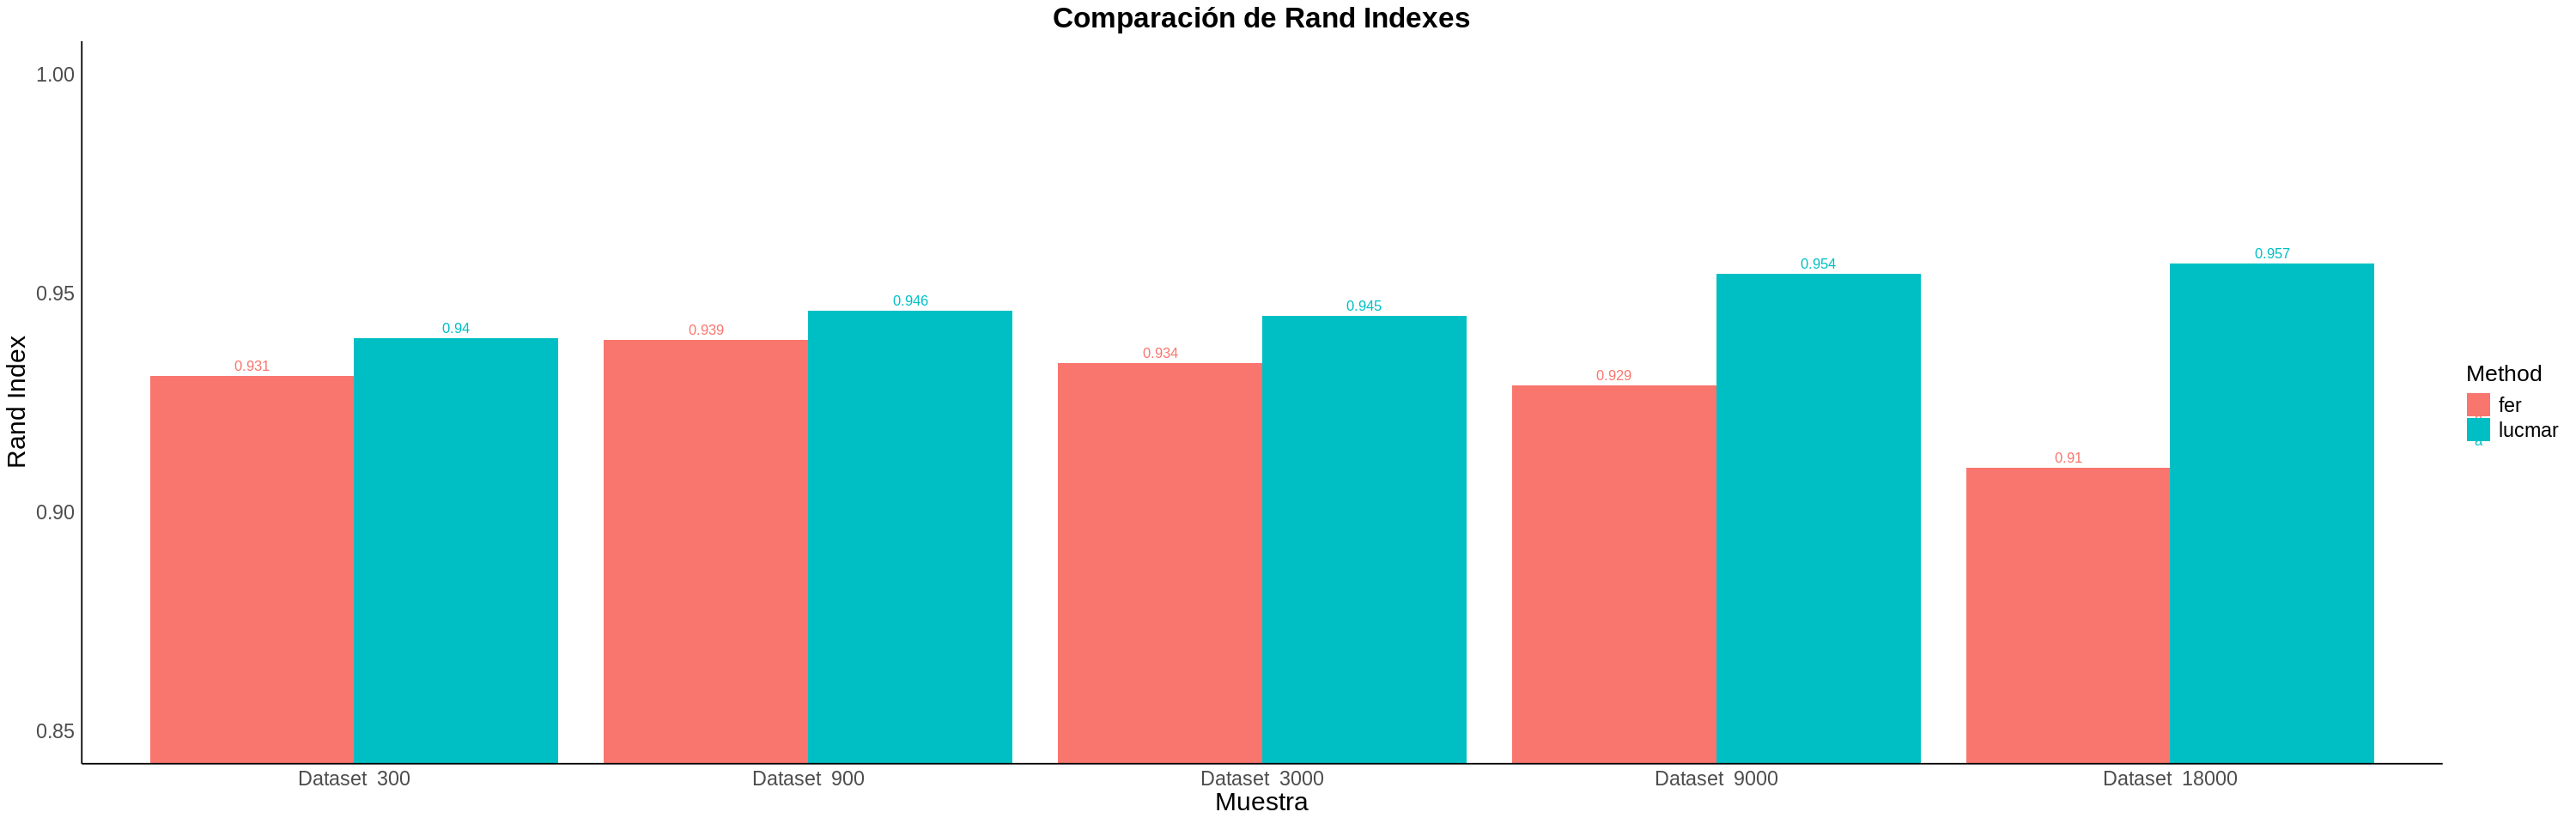

In [ ]:
# Comparación de RI
options(warn = -1) # Silenciamos además los warnings
options(repr.plot.width = 25, repr.plot.height = 8)

# Crear el gráfico de barras con etiquetas del mismo color que las barras
ggplot(results, aes(x = Muestra, y = RI, fill = Method)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_text(aes(label = round(RI, 3), color = Method),
            position = position_dodge(width = 0.9),
            vjust = -0.5, size = 3.5) +  # Ajusta vjust para la posición vertical y size para el tamaño del texto
  labs(title = "Comparación de Rand Indexes", y = "Rand Index") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),  # Elimina la cuadrícula principal
    panel.grid.minor = element_blank(),  # Elimina la cuadrícula menor
    axis.line = element_line(color = "black"),  # Añade líneas de eje
    text = element_text(size = 16),  # Aumenta el tamaño del texto en general
    axis.title = element_text(size = 18),  # Aumenta el tamaño del título de los ejes
    axis.text = element_text(size = 14),  # Aumenta el tamaño del texto de los ejes
    legend.text = element_text(size = 14),  # Aumenta el tamaño del texto de la leyenda
    legend.title = element_text(size = 16),  # Aumenta el tamaño del título de la leyenda
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)  # Aumenta el tamaño del título del gráfico
  ) +
  # scale_color_manual(values = c("fer" = "blue", "lucmar" = "red")) +  # Ajusta los colores de las etiquetas
  coord_cartesian(ylim = c(0.85, 1.0))  # Establece el límite del eje y en 0.70 a 1.0

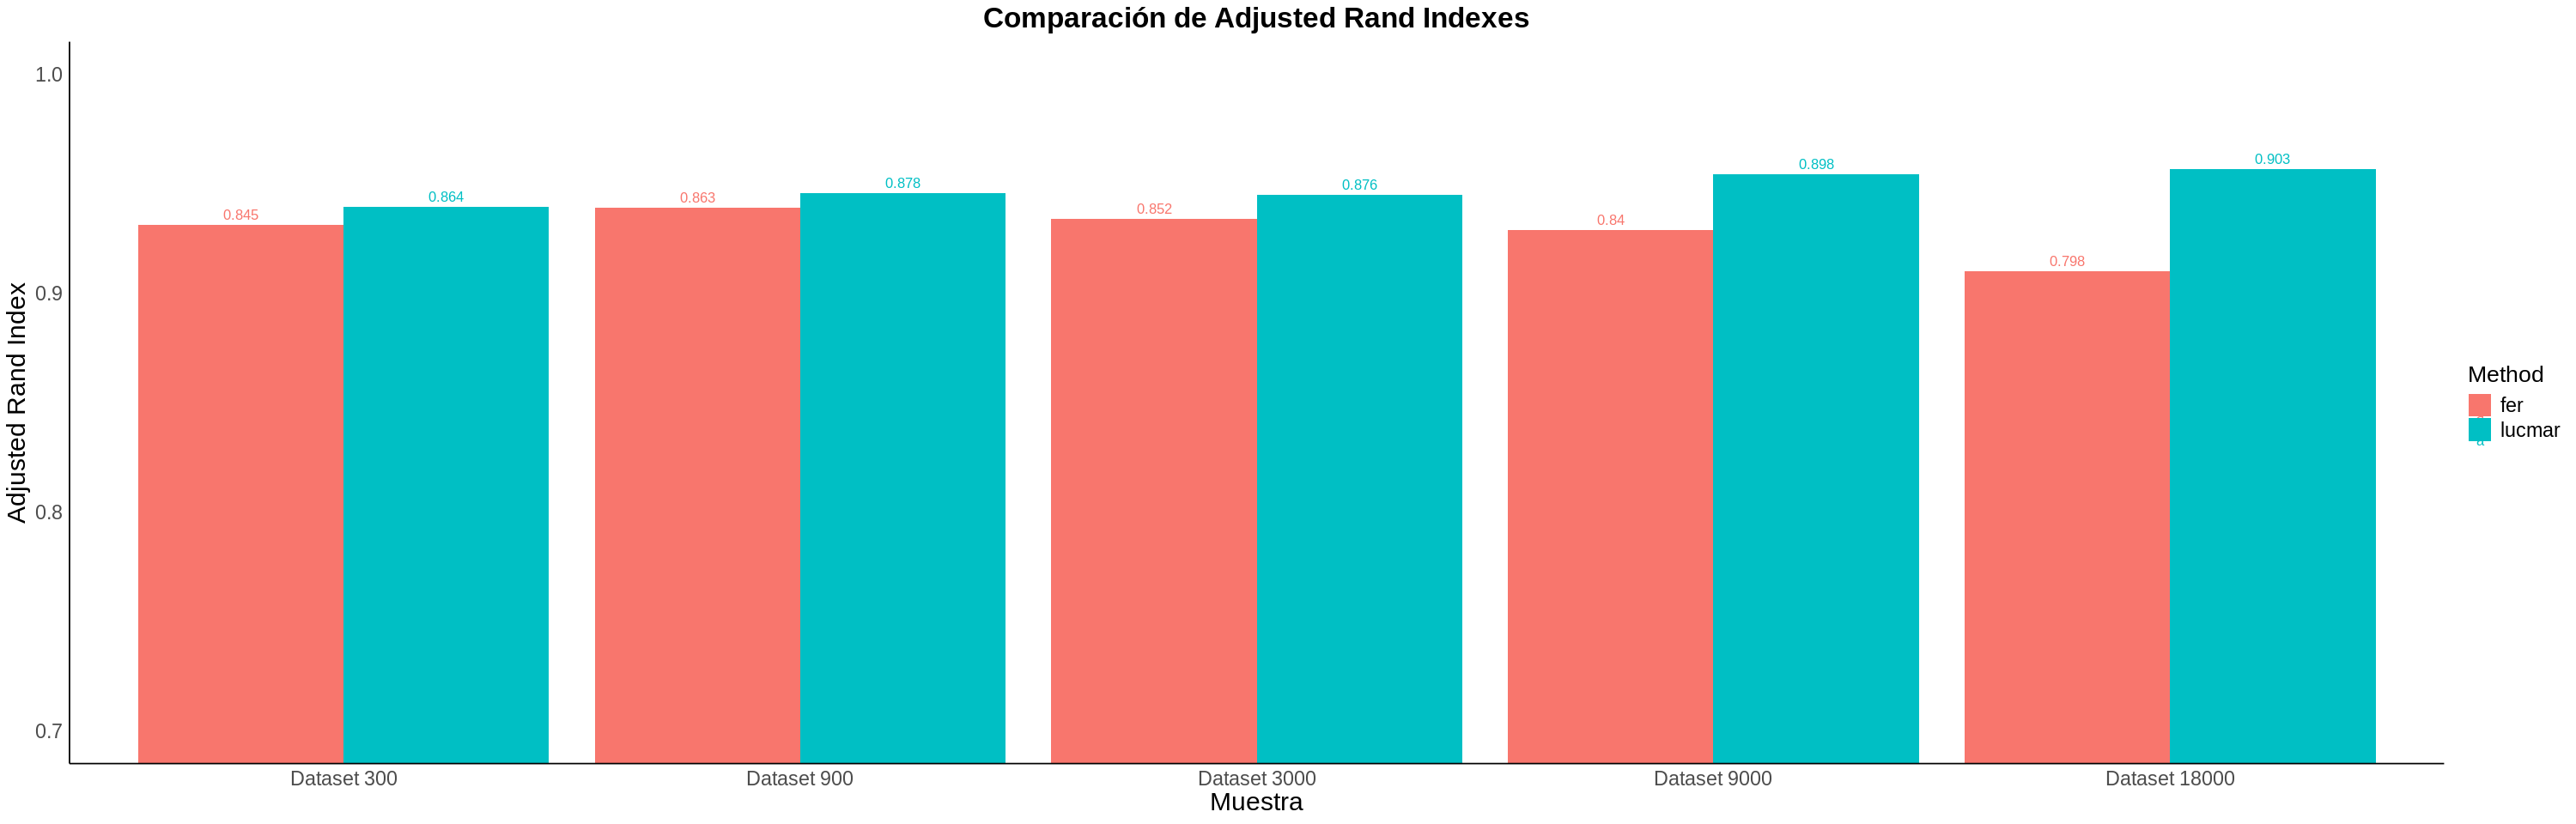

In [ ]:
# Comparación de ARI
options(warn = -1) # Silenciamos además los warnings
options(repr.plot.width = 25, repr.plot.height = 8)

# Crear el gráfico de barras con etiquetas del mismo color que las barras
ggplot(results, aes(x = Muestra, y = RI, fill = Method)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_text(aes(label = round(ARI, 3), color = Method),
            position = position_dodge(width = 0.9),
            vjust = -0.5, size = 3.5) +  # Ajusta vjust para la posición vertical y size para el tamaño del texto
  labs(title = "Comparación de Adjusted Rand Indexes", y = "Adjusted Rand Index") +
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),  # Elimina la cuadrícula principal
    panel.grid.minor = element_blank(),  # Elimina la cuadrícula menor
    axis.line = element_line(color = "black"),  # Añade líneas de eje
    text = element_text(size = 16),  # Aumenta el tamaño del texto en general
    axis.title = element_text(size = 18),  # Aumenta el tamaño del título de los ejes
    axis.text = element_text(size = 14),  # Aumenta el tamaño del texto de los ejes
    legend.text = element_text(size = 14),  # Aumenta el tamaño del texto de la leyenda
    legend.title = element_text(size = 16),  # Aumenta el tamaño del título de la leyenda
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)  # Aumenta el tamaño del título del gráfico
  ) +
  coord_cartesian(ylim = c(0.70, 1.0))  # Establece el límite del eje y en 0.70 a 1.0


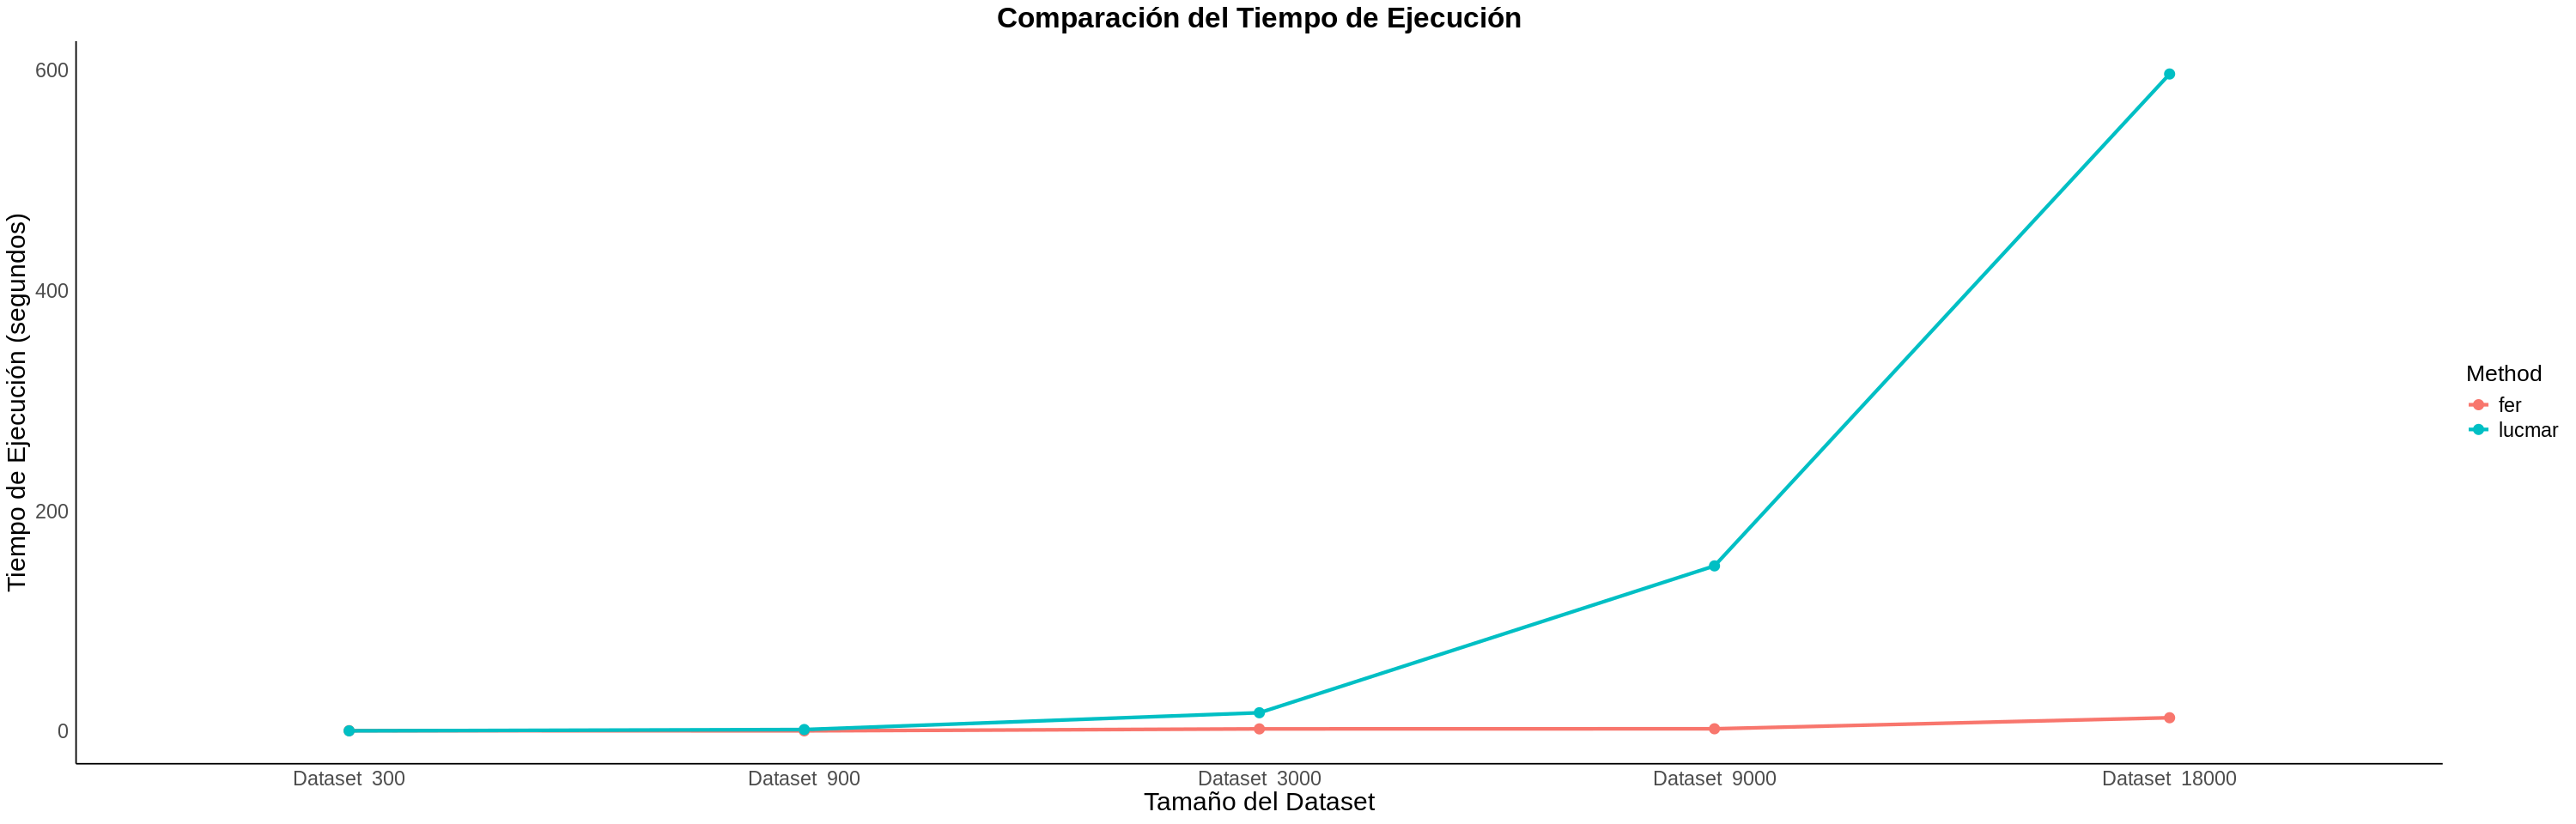

In [ ]:
# Comparamos los tiempos de ejecución
options(warn = -1) # Silenciamos además los warnings
options(repr.plot.width = 25, repr.plot.height = 8)

ggplot(results, aes(x = Muestra, y = ExecutionTime, color = Method, group = Method)) +
  geom_line(linewidth = 1.2) +  # Ajusta el grosor de las líneas
  geom_point(size = 3) +       # Ajusta el tamaño de los puntos
  labs(title = "Comparación del Tiempo de Ejecución",
       x = "Tamaño del Dataset",
       y = "Tiempo de Ejecución (segundos)") +
  theme_minimal() +           # Aplica un tema minimalista
  theme(
    panel.grid.major = element_blank(),  # Elimina la cuadrícula principal
    panel.grid.minor = element_blank(),  # Elimina la cuadrícula menor
    axis.line = element_line(color = "black"),  # Añade líneas de eje
    text = element_text(size = 16),  # Aumenta el tamaño del texto en general
    axis.title = element_text(size = 18),  # Aumenta el tamaño del título de los ejes
    axis.text = element_text(size = 14),  # Aumenta el tamaño del texto de los ejes
    legend.text = element_text(size = 14),  # Aumenta el tamaño del texto de la leyenda
    legend.title = element_text(size = 16),  # Aumenta el tamaño del título de la leyenda
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5)  # Aumenta el tamaño del título del gráfico
  )

# Datos funcionales

Instalamos y cargamos las librerías que vamos adicionalmente utilizar en la ejecución de datos funcionales.

In [ ]:
# Instalamos las librerías que usaremos para la data funcional de Marce y Lucas
install.packages('abind')
install.packages('corrplot')
install.packages('scatterplot3d')
install.packages('ggmap')
install.packages('maps')
install.packages('mapdata')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘plyr’, ‘jpeg’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('abind')
library('corrplot')
library('scatterplot3d')
library('ggmap')
library('maps')
library('mapdata')

corrplot 0.94 loaded

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.


Continuamos con las funciones, que vamos a tener que adaptarlas a la medida de los datos funcionales.

In [ ]:
######################################
### cluster_alloc_functional_fer() ###
######################################

# library(cluster)
# library(geometry)

# Definimos las distancias
distancia_euclidea_fer <- function(point, hull) {
    hull_distances = apply(hull, 1, function(hull_point) {
        sqrt(sum((point - hull_point)^2))
    })
    return(min(hull_distances))
}

distancia_mahalanobis_fer <- function(point, hull_points, cov_matrix) {    # Le cambiamos el nombre porque si no nos rompe de arriba
    cluster_distances = apply(hull_points, 1, function(hull_point) {
        diff = point - hull_point
        sqrt(t(diff) %*% solve(cov_matrix) %*% diff)
    })
    return(min(cluster_distances))
}

# Armamos la función para poder clusterizar
cluster_alloc_functional_fer <- function(X_functional, ld, alpha_q = seq(0.5, 0.9, 0.1), K, distance = "euclidean", n_arch = 4, seed_arch = 9102) {

    d <- dim(X_functional) # Esto en realidad es del proceso anterior, pero lo vamos a necesitar para reshapear la base funcional
    # Tenemos primero que transformar la base funcional en
    X = as.matrix(X_functional[,,1])
    for (l in 2:d[3]) X = cbind(X, X_functional[,,l])

    # Esto de abajo es igual, porque en realidad hacemos la misma cuenta sobre información reshapeada. Es como que la llevamos a un contexto multidimensional como el que estábamos trabajando.
    # d <- dim(X_functional) # d <- dim(X)
    alpha_length <- length(alpha_q)
    cluster <- matrix(NA, nrow = d[1], ncol = alpha_length)
    archetypes <- vector("list", length = K * alpha_length)

    for (j in 1:alpha_length) {
        region_index <- which(ld > quantile(ld, alpha_q[j]))
        others_index <- which(ld <= quantile(ld, alpha_q[j]))

        if (length(region_index) <= K + 1) {
            next
        }

        # Clustering for the main region
        region_cluster <- kmeans(X[region_index, ], centers = K)$cluster
        cluster[region_index, j] <- region_cluster

        # Compute archetypes for each cluster
        for (k in 1:K) {
            # arch <- archetypal(df = data.frame(X[which(cluster[, j] == k), ]), kappas = n_arch, verbose = FALSE, rseed = seed_arch, save_history = FALSE)
            # archetypes[[k + (j - 1) * K]] <- arch$BY

            # Esto es usando "archetypes"
            arch <- archetypes(data = data.frame(X[which(cluster[, j] == k), ]), k = n_arch, verbose = FALSE)
            archetypes[[k + (j - 1) * K]] <- parameters(arch)
        }

        # Assign clusters to remaining observations based on convex hull distances
        for (i in others_index) {
            min_dist <- Inf
            closest_cluster <- NA

            for (k in 1:K) {
                # Esto es de lo que hicimos primero, de considerar una cápsula convexa
                # hull_indices <- convhulln(archetypes[[k + (j - 1) * K]])
                # hull_points <- archetypes[[k + (j - 1) * K]][hull_indices, ]

                # Ahora directamente consideramos
                archetype_point <- archetypes[[k + (j - 1) * K]]

                if (distance == "euclidean") {
                    # dist_to_hull <- distancia_euclidea_fer(X[i, ], hull_points)
                    dist_to_archetype <- distancia_euclidea_fer(X[i, ], archetype_point)
                } else if (distance == "mahalanobis") {
                  # Va a ser la distancia a los puntos de la cobertura convexa, pero estimando la covarianza con los puntos del cluster !!!
                    cluster_points <- X[region_index[region_cluster == k], ]
                    cov_matrix <- var(cluster_points)

                    # dist_to_hull <- distancia_mahalanobis_fer(X[i, ], hull_points, cov_matrix)
                    dist_to_archetype <- distancia_mahalanobis_fer(X[i, ], archetype_point, cov_matrix)
                } else {
                    stop("Invalid distance parameter")
                }

                # if (!is.na(dist_to_hull) && dist_to_hull < min_dist) {
                #     min_dist <- dist_to_hull
                if (!is.na(dist_to_archetype) && dist_to_archetype < min_dist) {
                    min_dist <- dist_to_archetype
                    closest_cluster <- k
                }
            }

            cluster[i, j] <- closest_cluster
        }
    }

    return(list(cluster = cluster, archetypes = archetypes))
}

In [ ]:
#####################################################
### cluster_alloc_functional() de Lucas y Marcela ###
#####################################################

# Estas son las funciones de distancia que establecieron Lucas y Marcela

#### MAHALANOBIS DIST
mahalanobis_dist = function(x, data, sigma=var(data)) {
  if (any(class(data)=="numeric")) {
    #print("Sigma can't be approximated if nrow(data)=1")
    return(NA)
  }
  else {
    n = nrow(as.matrix(data))
    cond_number = rcond(sigma)
    if (cond_number < 0.01) {
      #message = paste0(
      #                paste("Condition number is:", cond_number),
      #                paste(". Matrix is ill-conditioned, return NA")
      #                )
      #print(message)
      return(NA)
    } else {
      sigma_inv = solve(sigma)
      md = numeric(n)
      for (i in 1:n) md[i] = (x-data[i,])%*%sigma_inv%*%as.matrix(x-data[i,])
      return(md)
    }
  }
}

#### EUCLIDEAN DIST
euclidean_dist = function(x, data) {
  if (any(class(data)=="numeric")) data = matrix(data, nrow=1, ncol=length(data))
  n = nrow(data)
  ed = numeric(n)
  for (i in 1:n) ed[i] = (x-data[i,])%*%as.matrix(x-data[i,])
  return(ed)
}

# La función propiamente dicha

#################################
#### CLUSTER ALLOCATION VER2 ####
#################################

# source("distances.R") # Esto lo tenemos definido acá arriba

cluster_alloc_functional = function(X_functional, ld, alpha_q=seq(0.5,0.9,0.1), K, distance="euclidean") {
  #INPUT
  #X: data that will be assigned local depth. Matrix each row is an observation.
  #ld: local depth calculated for the data.
  #alpha_q: a grid of values between 0.5 and 0.9 to select the percentage of deepest points for
  #                the core region. For example, alpha_quantile = 0.9 implies that the core region
  #                contains the ten percent of deepest points.
  #K: number of clusters.
  #distance: euclidean or mahalanobis.
  #verbose: if TRUE prints the progress
  #OUTPUT
  #clusters: clusters allocation.

  # Estructuramos la data funcional
  d <- dim(X_functional) # Esto en realidad es del proceso anterior, pero lo vamos a necesitar para reshapear la base funcional

  X = as.matrix(X_functional[,,1])
  for (l in 2:d[3]) X = cbind(X, X_functional[,,l])

  # d = dim(X) # Esto estaba acá originariamente
  alpha_length = length(alpha_q)
  cluster = matrix(NA, nrow=d[1], ncol=alpha_length)

  for (j in 1:alpha_length) {
    # Step 1: core
    region_index = which(ld>quantile(ld,alpha_q[j]))
    others_index = which(ld<=quantile(ld,alpha_q[j]))
    if (length(region_index)<=K+1) {
      #print("Warning: the number of core points is less than the number of clusters")
      next
    }
    region_cluster = kmeans(X[region_index,], centers=K)$cluster
    cluster[region_index,j] = region_cluster

    # Aquí habría que calcular los arquetipos

    # Step 2: distance. # Esta distancia sería luego al arquetipo
    if (distance=="euclidean") {
      for (i in others_index) {
        dis = numeric(K)
        for (k in 1:K) dis[k] = min(euclidean_dist(x=X[i,], data=X[region_index[region_cluster==k],]))
        cluster[i,j] = which.min(dis)
      }
    }
    else if(distance=="mahalanobis") {
      for (i in others_index) {
        dis = numeric(K)
        for (k in 1:K) {
          md = mahalanobis_dist(x=X[i,], data=X[region_index[region_cluster==k],])
          if (any(is.na(md))) {
            cluster[i,j] = NA
          } else {
          dis[k] = min(md)
          cluster[i,j] = which.min(dis)
          }
        }
      }
    }
    else {
      print("Distance parameter invalid")
    }
  }
  return(cluster)
}

In [ ]:
# Levantamos los datos que se usaron de la National Oceanic and Atmosferic Administration (NOAA) para el paper de IDLD
temp_matrix <- read.csv('/home/temp_matrix.csv', header = TRUE)
sal_matrix <- read.csv('/home/sal_matrix.csv', header = TRUE) # No mirar en todos los puntos. Mirar en pares e impares
oxy_matrix <- read.csv('/home/oxy_matrix.csv', header = TRUE) # No mirar en todos los puntos. Mirar en pares e impares
fluor_matrix <- read.csv('/home/fluor_matrix.csv', header = TRUE)

In [ ]:
# Esto se rompe si trato con multifuncional pero para una sola base.
# data_alg =  abind(temp_matrix,oxy_matrix,sal_matrix, fluor_matrix, along=3) # Esto es si lo hacemos multifuncional. dim(data_alg) = 378-28-4
data_alg =  oxy_matrix # Esto es si lo hacemos funcional
dim(data_alg)

[1] 378  28

In [ ]:
# Esto lo corremos solamente si agarramos un caso funcional aislado.
data_alg <- as.matrix(data_alg)

# Lo llevamos a tipo double
storage.mode(data_alg) <- "double"

In [ ]:
# Fijamos parámetros y profundidades iniciales, que no las vamos a cambiar
# Esto va a ser insumo de ambos criterios de clasificación

tic()
beta = 0.2
m = 100
alpha_q = c(0.5)
K = 2
distance = "euclidean"

# Caso multifuncional. Se podría usar idld() especificando el tipo.
# ld_lucmar_func = idld_mf(data_alg,data_alg,beta,m,verbose=FALSE) # Esto es si hacemos el multifuncional
ld_lucmar_func = idld_f(data_alg,data_alg,beta,m,verbose=FALSE) # Esto es si hacemos el funcional
toc()

1.345 sec elapsed


### Algoritmo de Fer.

# Aquí tenemos que robustecer la estrategia, porque en realidad no siempre va a encontrar 3, sobre todo si la base es chica y hay muchas muestras parecidas. Quizás la heurística podría ser que arranque con 3 o 4, y a medida que no va encontrando, que vaya actualizando la cantidad de arquetipos al número inmediatamente inferior. Eventualmente, si el arquetipo es 1 el paper de Breiman decía que el que minimice el proceso sería el promedio.

In [ ]:
# Probamos con 3 arquetipos, como veníamos haciendo las pruebas
tic()
cluster_original_fer = cluster_alloc_fer(X = data_alg, ld = ld_lucmar_func, alpha_q = alpha_q, K = K, distance = distance, n_arch = 3, seed_arch = 9102)
toc()
# Esto no corre ni para atrás ni para adelante

0.181 sec elapsed


### Algoritmo de Marce y Lucas.

In [ ]:
tic()
# cluster_original_lucmar = cluster_alloc_functional(X = data_alg, ld = ld_lucmar_func, alpha_q = alpha_q, K = K, distance = distance) # Esto es si lo hacemos multifuncional
cluster_original_lucmar = cluster_alloc(X = data_alg, ld = ld_lucmar_func, alpha_q = alpha_q, K = K, distance = distance) # Esto es si lo hacemos unifuncional
toc()

0.877 sec elapsed


### ¿Qué pasaría si tuvieramos 1_512 observaciones?

In [ ]:
data_alg <- rbind(temp_matrix, sal_matrix, oxy_matrix, fluor_matrix)

data_alg <- as.matrix(data_alg)
storage.mode(data_alg) <- "double"

In [ ]:
# Función para crear dataframes con columnas colapsadas
collapse_columns <- function(mat, num_cols) {
  n <- ncol(mat)
  collapsed <- sapply(1:num_cols, function(i) {
    col_indices <- ((i-1) * n / num_cols + 1):(i * n / num_cols)
    rowMeans(mat[, col_indices, drop = FALSE])
  })
  as.data.frame(collapsed)
}

In [ ]:
# Generamos dataframes colapsados
collapsed_dfs <- lapply(2:15, function(cols) collapse_columns(data_alg, cols))

# Asignamos nombres
names(collapsed_dfs) <- paste0("collapsed_", 2:15, "_cols")

In [ ]:
# Ejemplos
# collapsed_dfs$collapsed_2_cols
# collapsed_dfs$collapsed_15_cols
X_ejem =  as.matrix(collapsed_dfs$collapsed_2_cols)

head(X_ejem)

V1,V2
21.88706,23.68685
25.22431,22.77523
27.24716,24.64814
27.43717,24.36772
27.55162,26.88465
19.66475,19.40967


In [ ]:
# Fijamos parámetros y profundidades iniciales, que no las vamos a cambiar
# Esto va a ser insumo de ambos criterios de clasificación

tic()
beta = 0.2
m = 100
alpha_q = c(0.5)

K = 4 # Le ponemos tantos como cantidad de bases attachadas
classgood = c(rep(1,dim(X_ejem)[1]/4),rep(2,dim(X_ejem)[1]/4),rep(3,dim(X_ejem)[1]/4), rep(4,dim(X_ejem)[1]/4))

distance = "euclidean"

ld_lucmar_func = idld_f(X_ejem,X_ejem,beta,m,verbose = FALSE) # Esto es si hacemos el funcional
toc()

13.787 sec elapsed


### Algoritmo de Fer.

In [ ]:
tic()
cluster_original_fer = cluster_alloc_fer(X = X_ejem,
                                         ld = ld_lucmar_func,
                                         alpha_q = alpha_q,
                                         K = K,
                                         distance = distance,
                                         n_arch = 3,
                                         seed_arch = 9102)
toc()

2.121 sec elapsed


In [ ]:
# Calcular el índice de Rand (RI)
ri <- rand.index(classgood, cluster_original_fer$cluster)
print(paste("Rand Index (RI):", ri))

[1] "Rand Index (RI): 0.845026244926973"


In [ ]:
# Calcular el índice Rand ajustado (ARI)
ari <- adjustedRandIndex(classgood, cluster_original_fer$cluster)
print(paste("Adjusted Rand Index (ARI):", ari))

[1] "Adjusted Rand Index (ARI): 0.62062508571774"


### Algoritmo de Marce y Lucas.

In [ ]:
tic()
cluster_original_lucmar = cluster_alloc(X = X_ejem, ld = ld_lucmar_func, alpha_q = alpha_q, K = K, distance = distance) # Esto es si lo hacemos unifuncional
toc()

5.454 sec elapsed


In [ ]:
# Asignaciones de clúster para el primer alpha_q
pred_clusters_lucmar = cluster_original_lucmar[, 1]

In [ ]:
# Calcular el índice de Rand (RI)
ri <- rand.index(classgood, pred_clusters_lucmar)
print(paste("Rand Index (RI):", ri))

[1] "Rand Index (RI): 0.872941462782628"


In [ ]:
# Calcular el índice Rand ajustado (ARI)
ari <- adjustedRandIndex(classgood, pred_clusters_lucmar)
print(paste("Adjusted Rand Index (ARI):", ari))

[1] "Adjusted Rand Index (ARI): 0.70892090136776"


Bien, ahora hacemos una iteración a ver cómo resulta con todas las bases.

In [ ]:
# Probamos con 11 columnas colapsadas

In [ ]:
X_ejem =  as.matrix(collapsed_dfs$collapsed_11_cols)

In [ ]:
# Fijamos parámetros y profundidades iniciales, que no las vamos a cambiar
# Esto va a ser insumo de ambos criterios de clasificación

tic()
beta = 0.2
m = 100
alpha_q = c(0.5)

K = 4 # Le ponemos tantos como cantidad de bases attachadas
classgood = c(rep(1,dim(X_ejem)[1]/4),rep(2,dim(X_ejem)[1]/4),rep(3,dim(X_ejem)[1]/4), rep(4,dim(X_ejem)[1]/4))

distance = "euclidean"

ld_lucmar_func = idld_f(X_ejem,X_ejem,beta,m,verbose = FALSE) # Esto es si hacemos el funcional
toc()

15.843 sec elapsed


In [ ]:
tic()
cluster_original_fer = cluster_alloc_fer(X = X_ejem,
                                         ld = ld_lucmar_func,
                                         alpha_q = alpha_q,
                                         K = K,
                                         distance = distance,
                                         n_arch = 3,
                                         seed_arch = 9102)
toc()

0.903 sec elapsed


In [ ]:
# Calcular el índice de Rand (RI)
ri <- rand.index(classgood, cluster_original_fer$cluster)
print(paste("Rand Index (RI):", ri))

[1] "Rand Index (RI): 0.9576063015838"


In [ ]:
# Calcular el índice Rand ajustado (ARI)
ari <- adjustedRandIndex(classgood, cluster_original_fer$cluster)
print(paste("Adjusted Rand Index (ARI):", ari))

[1] "Adjusted Rand Index (ARI): 0.887307852555367"


In [ ]:
tic()
cluster_original_lucmar = cluster_alloc(X = X_ejem, ld = ld_lucmar_func, alpha_q = alpha_q, K = K, distance = distance) # Esto es si lo hacemos unifuncional
toc()

7.379 sec elapsed


In [ ]:
# Asignaciones de clúster para el primer alpha_q
pred_clusters_lucmar = cluster_original_lucmar[, 1]

In [ ]:
# Calcular el índice de Rand (RI)
ri <- rand.index(classgood, pred_clusters_lucmar)
print(paste("Rand Index (RI):", ri))

[1] "Rand Index (RI): 0.858177597092223"


In [ ]:
# Calcular el índice Rand ajustado (ARI)
ari <- adjustedRandIndex(classgood, pred_clusters_lucmar)
print(paste("Adjusted Rand Index (ARI):", ari))

[1] "Adjusted Rand Index (ARI): 0.675696847454821"


¿Qué pasa si usamos todas las columnas, en vez de colapsar algo?

In [ ]:
X_ejem = data_alg

In [ ]:
# Fijamos parámetros y profundidades iniciales, que no las vamos a cambiar
# Esto va a ser insumo de ambos criterios de clasificación

tic()
beta = 0.2
m = 100
alpha_q = c(0.5)

K = 4 # Le ponemos tantos como cantidad de bases attachadas
classgood = c(rep(1,dim(X_ejem)[1]/4),rep(2,dim(X_ejem)[1]/4),rep(3,dim(X_ejem)[1]/4), rep(4,dim(X_ejem)[1]/4))

distance = "euclidean"

ld_lucmar_func = idld_f(X_ejem,X_ejem,beta,m,verbose = FALSE) # Esto es si hacemos el funcional
toc()

16.224 sec elapsed


In [ ]:
tic()
cluster_original_fer = cluster_alloc_fer(X = X_ejem,
                                         ld = ld_lucmar_func,
                                         alpha_q = alpha_q,
                                         K = K,
                                         distance = distance,
                                         n_arch = 2,
                                         seed_arch = 9102)
toc()

1.237 sec elapsed


In [ ]:
# Calcular el índice de Rand (RI)
ri <- rand.index(classgood, cluster_original_fer$cluster)
print(paste("Rand Index (RI):", ri))

[1] "Rand Index (RI): 0.872279649413997"


In [ ]:
# Calcular el índice Rand ajustado (ARI)
ari <- adjustedRandIndex(classgood, cluster_original_fer$cluster)
print(paste("Adjusted Rand Index (ARI):", ari))

[1] "Adjusted Rand Index (ARI): 0.707407101328654"


In [ ]:
tic()
cluster_original_lucmar = cluster_alloc(X = X_ejem, ld = ld_lucmar_func, alpha_q = alpha_q, K = K, distance = distance) # Esto es si lo hacemos unifuncional
toc()

8.122 sec elapsed


In [ ]:
# Asignaciones de clúster para el primer alpha_q
pred_clusters_lucmar = cluster_original_lucmar[, 1]

In [ ]:
# Calcular el índice de Rand (RI)
ri <- rand.index(classgood, pred_clusters_lucmar)
print(paste("Rand Index (RI):", ri))

[1] "Rand Index (RI): 0.834969483050224"


In [ ]:
# Calcular el índice Rand ajustado (ARI)
ari <- adjustedRandIndex(classgood, pred_clusters_lucmar)
print(paste("Adjusted Rand Index (ARI):", ari))

[1] "Adjusted Rand Index (ARI): 0.597426448835572"
